In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ast
import os

In [2]:
def replace(y, player):
    for row in y:
        for i in range(len(row)):
            if row[i] == player:
                row[i] = 0
    return y

In [3]:
def parse_filename(filename):
    parsed = filename.split("_")
    p1 = parsed[1]
    p2 = parsed[2]

    if "dnn" in p1:
        p1_model = "dnn"
    elif "minimax" in p1:
        p1_model = "minimax"

    if "dnn" in p2:
        p2_model = "dnn"
    elif "minimax" in p2:
        p2_model = "minimax"
        
    p1_model_level = int(p1[-1])
    p2_model_level = int(p2[-1])
        
    #return [filename, p1_model, p1_model_level, p2_model, p2_model_level]
    return [p1_model, p1_model_level, p2_model, p2_model_level]

In [4]:
def total_heatmap2(filepath, p1m="minimax", p2m="minimax", p1s=1, p2s=1):
    if filepath[-1] != "/":
        filepath = f"{filepath}/"
        
    for file in os.listdir(filepath):
        if file.endswith(".csv"):
            len_board = int(file[0])
            arr1 = np.ndarray(shape=(len_board,len_board))
            arr2 = np.ndarray(shape=(len_board,len_board))
            arr1.fill(0)
            arr2.fill(0)
            break
    
    for file in os.listdir(filepath):
        if file.endswith(".csv"):
            p1_model, p1_model_level, p2_model, p2_model_level = parse_filename(file)
            
            if p1_model == p1m and p2_model == p2m and p1_model_level == p1s and p2_model_level == p2s:
                
                selected_file = file
                
                df_file = f"{filepath}{file}"
                df = pd.read_csv(df_file, header=None)
                df.columns = ["Previous State", "Next State", "Player", "Cyber Move", "Game ID"]
                
                for each in np.unique(df["Game ID"]):
                    game = df[df["Game ID"] == each]
                    game.reset_index(drop=True, inplace=True)
                    x = np.array(ast.literal_eval(game["Next State"].to_list()[-1]))
            
                
                    for i in range(len_board):
                        for j in range(len_board):

                            element = x[i][j]

                            if element == 1:
                                arr1[i][j] += 1
                            elif element == 2:
                                arr2[i][j] +=1
    
    colors = "Blues"
    
    ax = plt.axes()
    #print(selected_file)
    title = f"Total number of moves by location for Player 1 - {p1m} skill level {p1s}"
    ax.set_title(title)
    ax = sns.heatmap(arr1, annot=True, fmt=".0g", ax = ax, cmap=colors)
    plt.xlabel("Board Column Index")
    plt.ylabel("Board Row Index")
    
    savefile = f"{len_board}x{len_board}_p1{p1m}{p1s}_p2{p2m}{p2s}_forPlayer1.png"
    savepath = f"./plots/total_heatmap/{savefile}"
    plt.savefig(savepath, bbox_inches='tight')
    plt.show()
    
    ax = plt.axes()
    title = f"Total number of moves by location for Player 2 - {p2m} skill level {p2s}"
    ax.set_title(title)
    ax = sns.heatmap(arr2, annot=True, fmt=".0g", ax = ax, cmap=colors)
    plt.xlabel("Board Column Index")
    plt.ylabel("Board Row Index")
    
    savefile = f"{len_board}x{len_board}_p1{p1m}{p1s}_p2{p2m}{p2s}_forPlayer2.png"
    savepath = f"./plots/total_heatmap/{savefile}"
    plt.savefig(savepath, bbox_inches='tight')
    plt.show()

In [5]:
models = ["dnn", "minimax"]
skills1 = list(range(0,6))
skills2 = list(range(0,6))

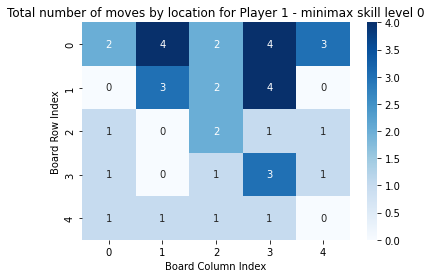

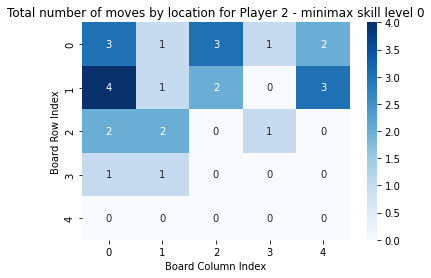

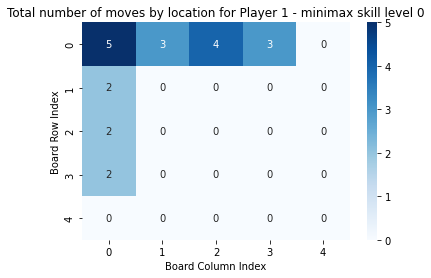

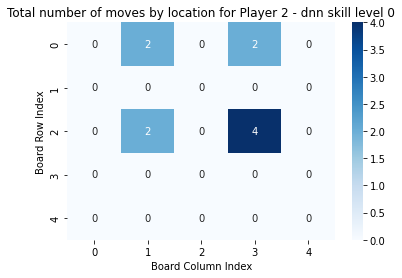

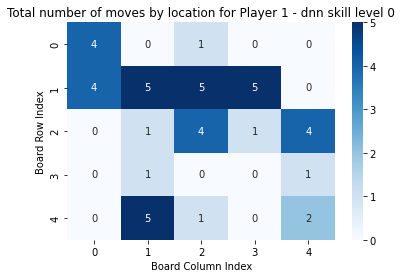

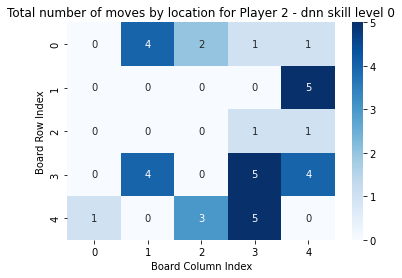

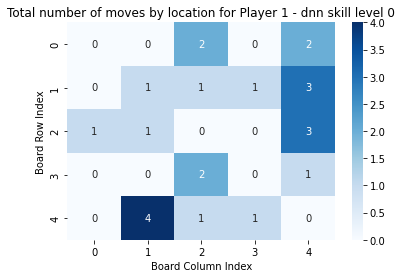

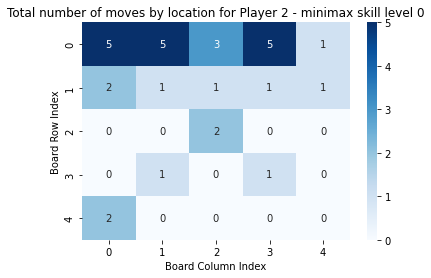

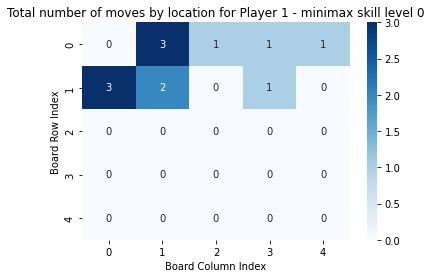

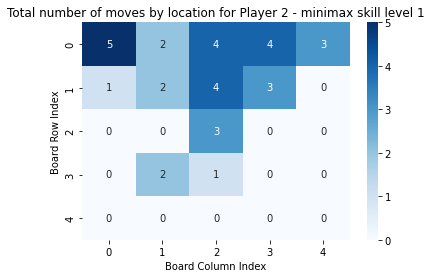

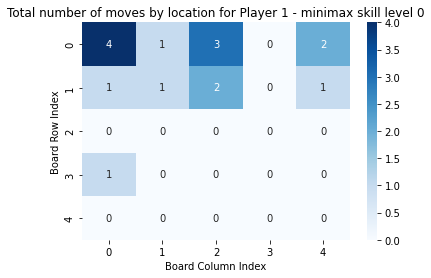

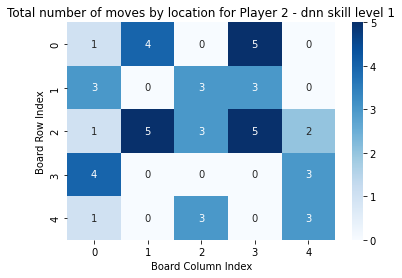

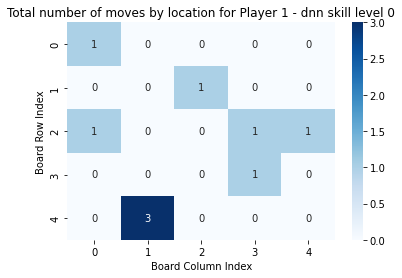

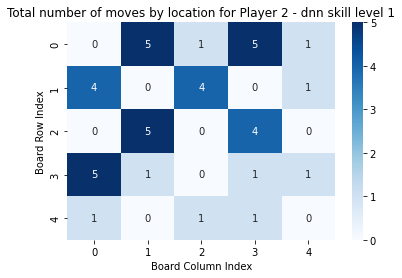

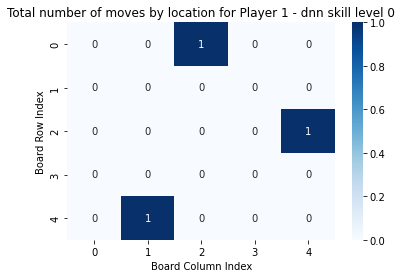

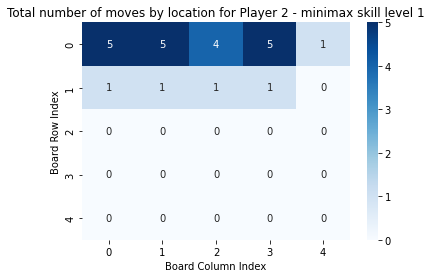

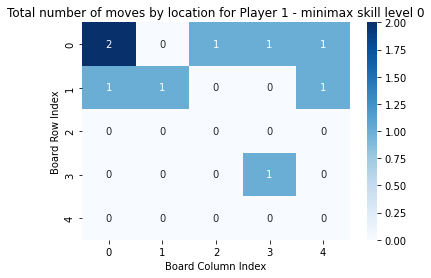

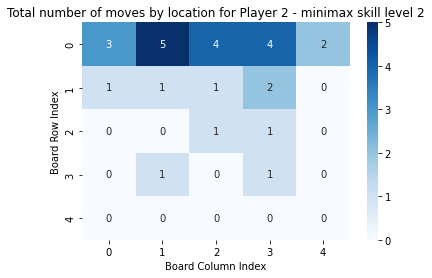

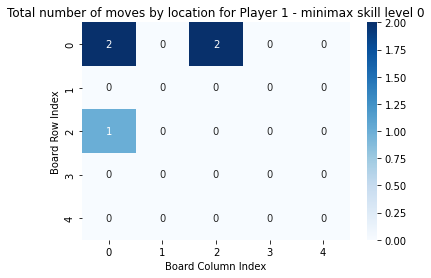

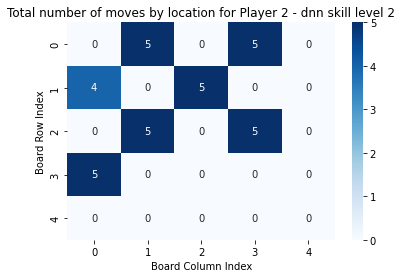

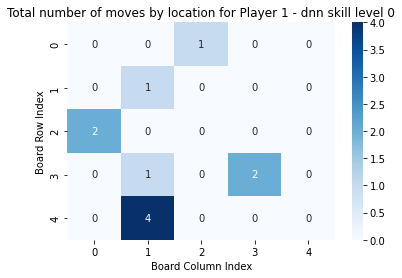

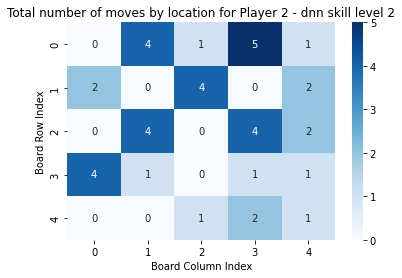

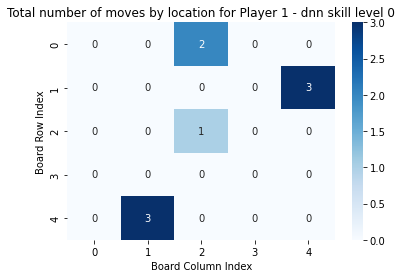

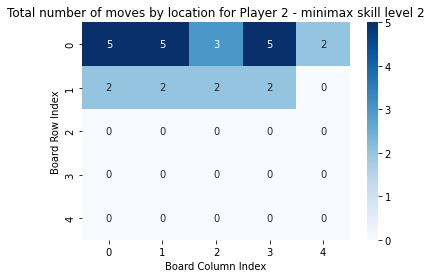

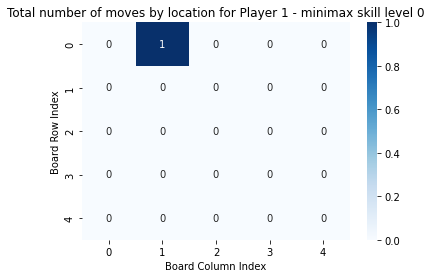

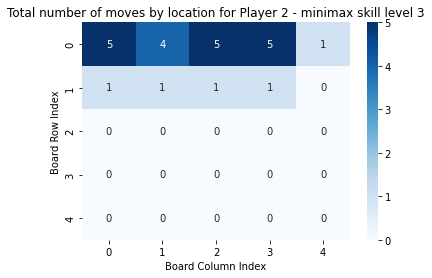

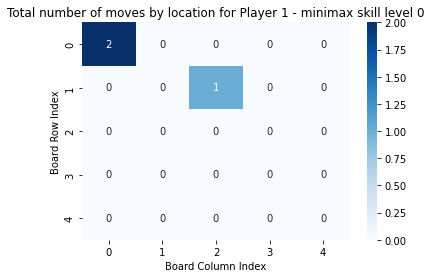

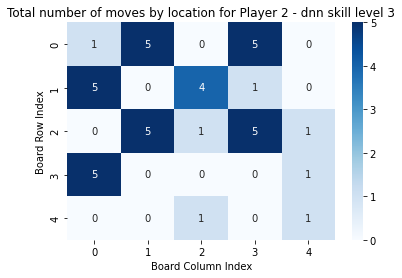

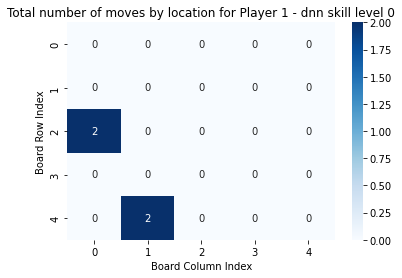

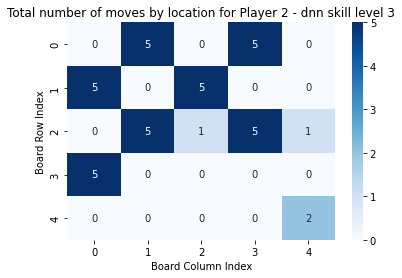

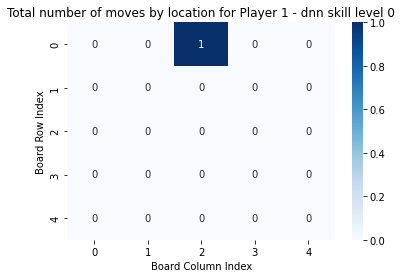

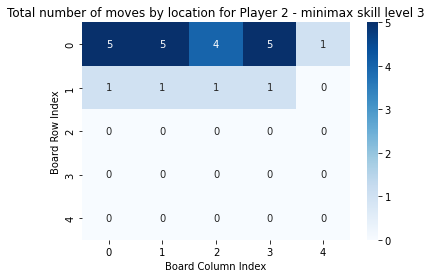

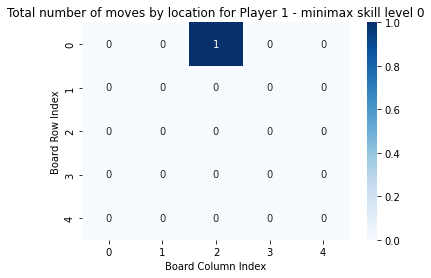

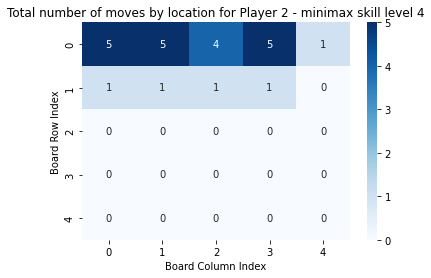

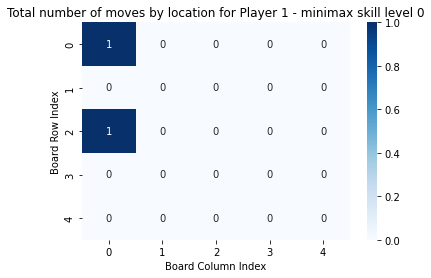

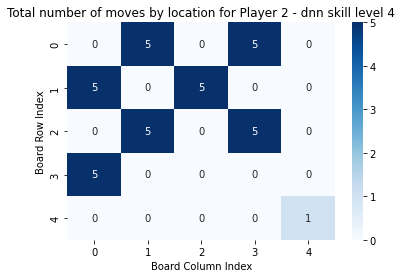

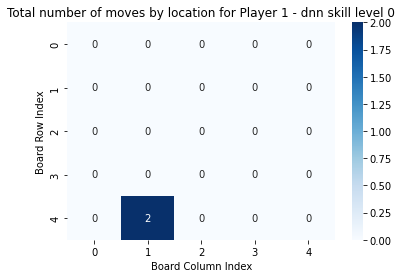

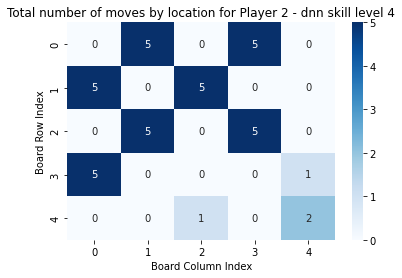

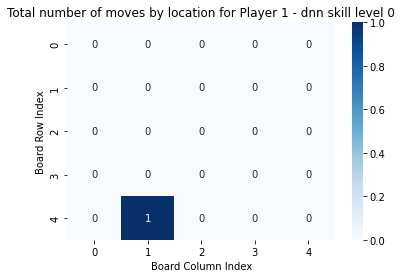

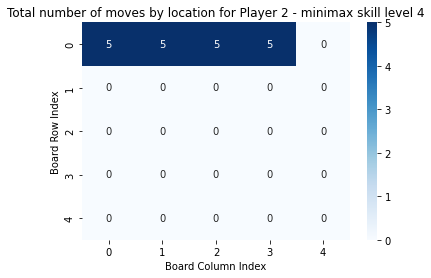

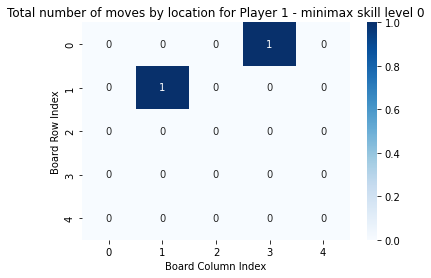

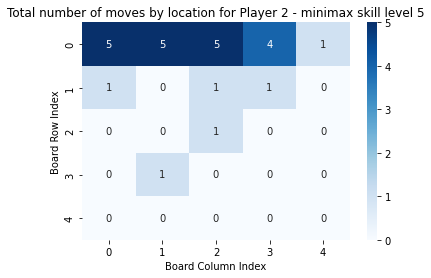

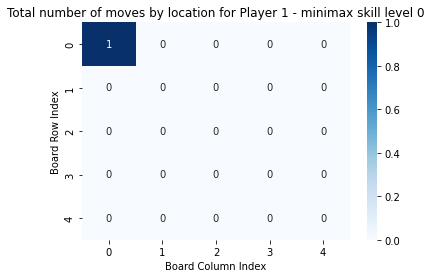

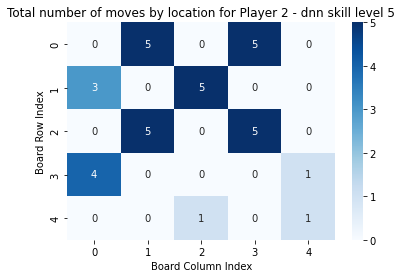

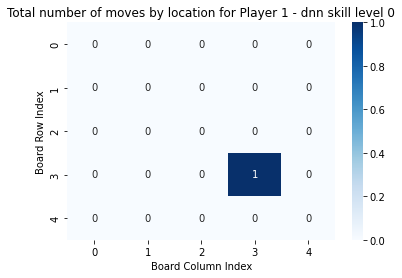

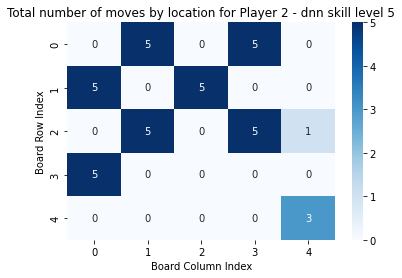

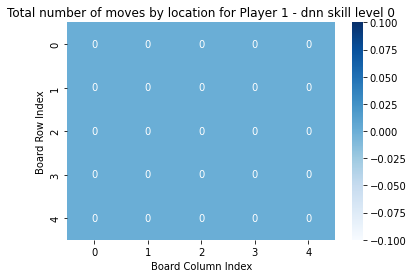

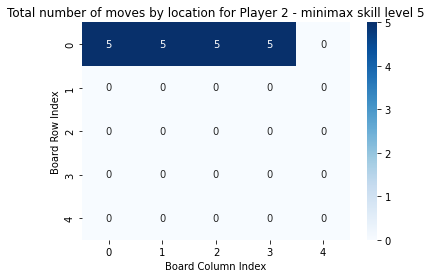

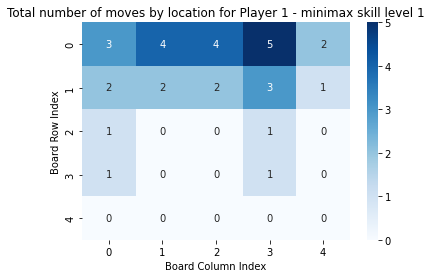

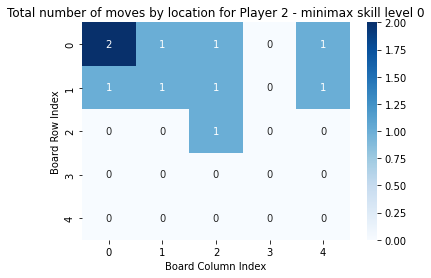

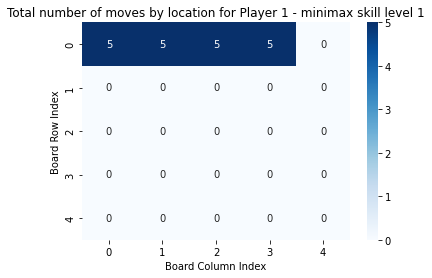

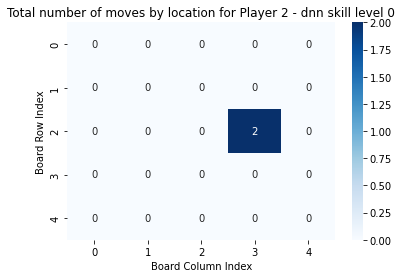

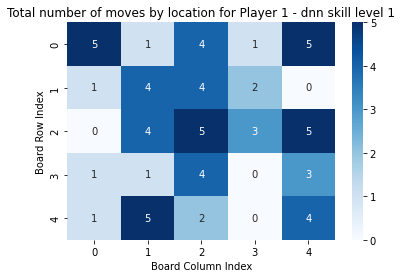

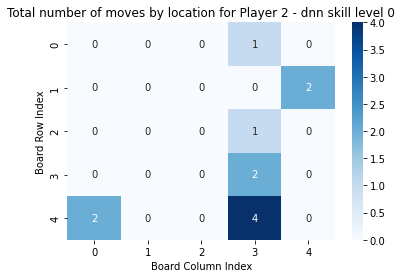

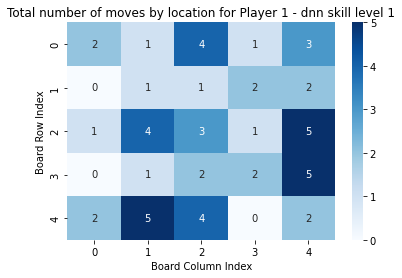

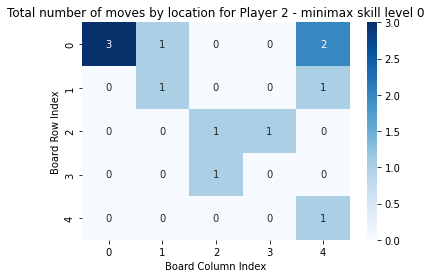

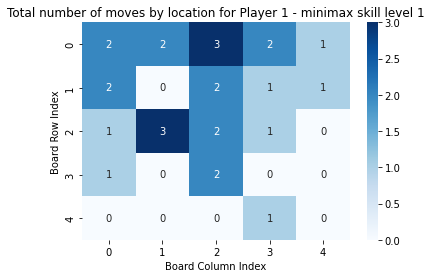

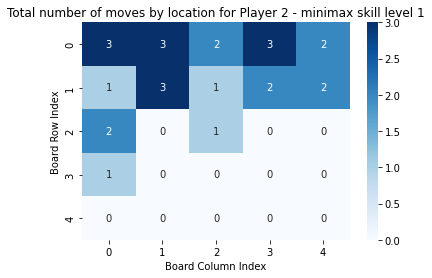

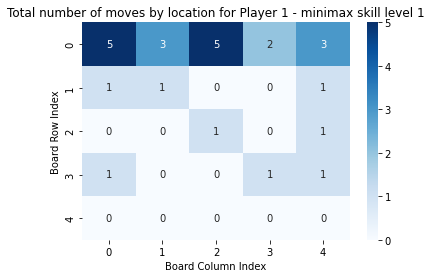

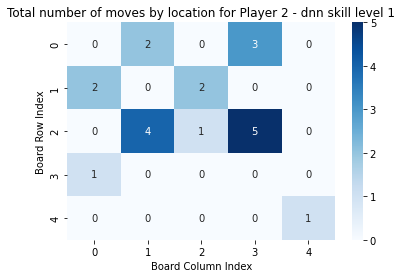

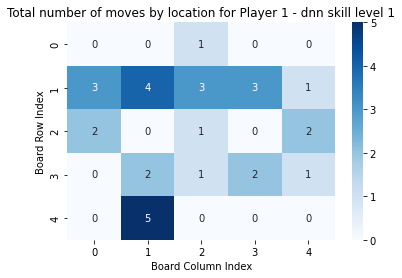

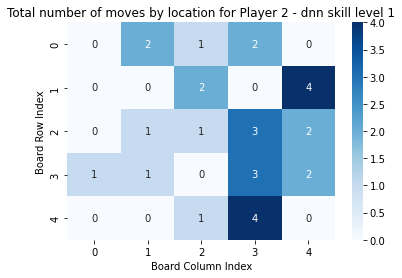

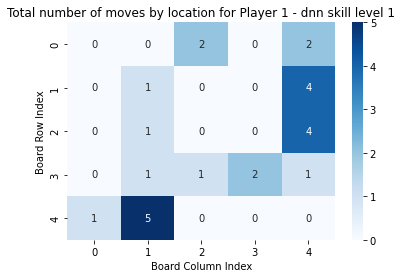

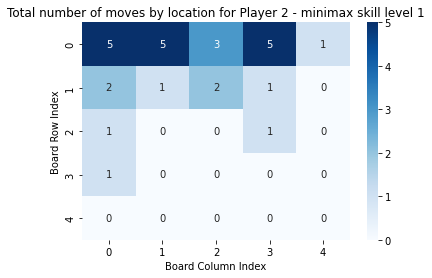

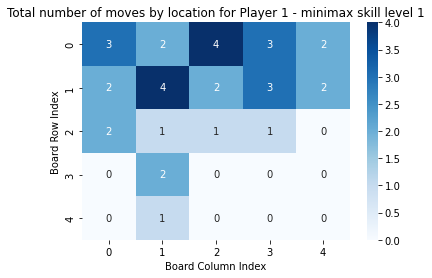

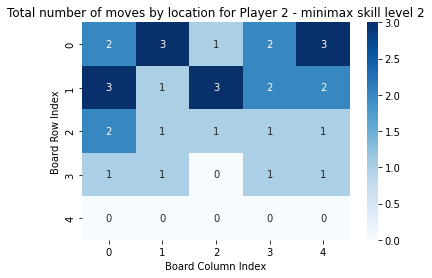

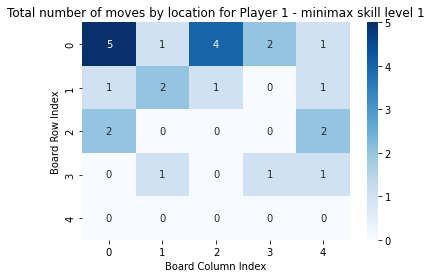

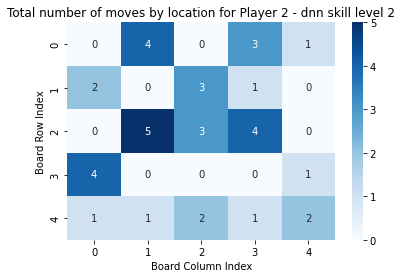

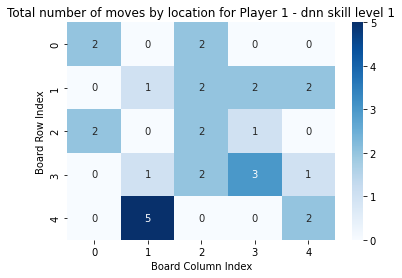

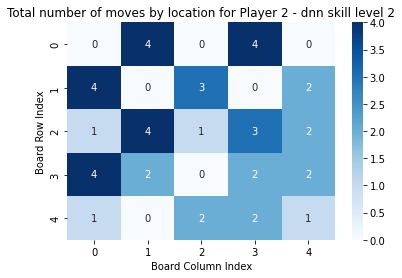

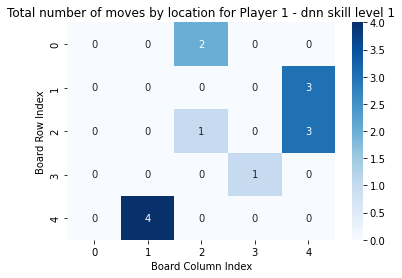

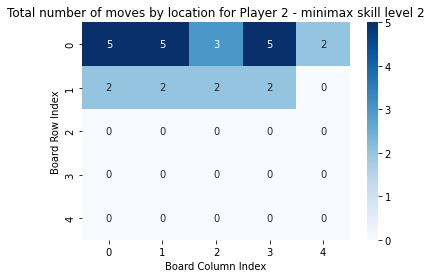

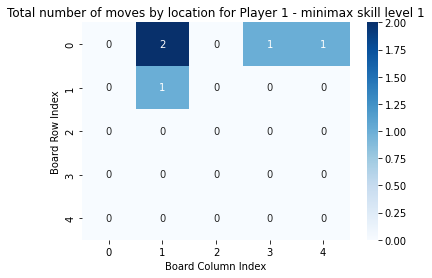

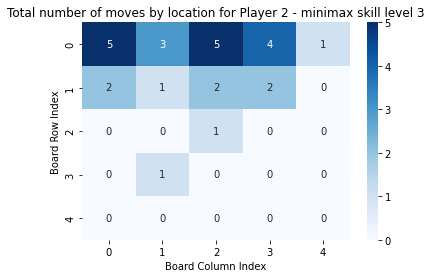

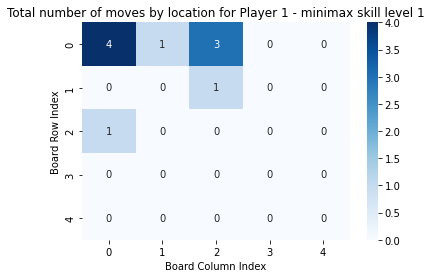

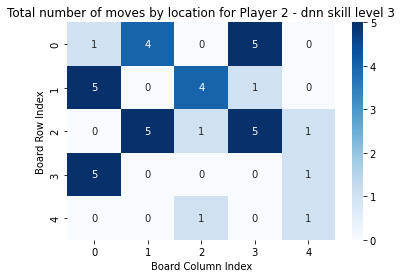

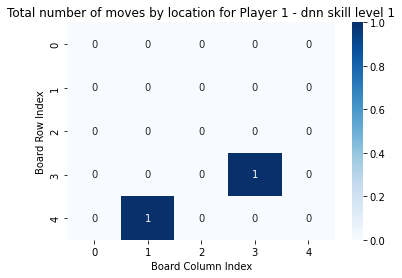

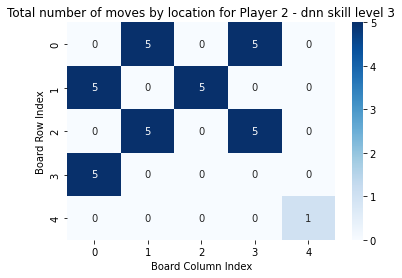

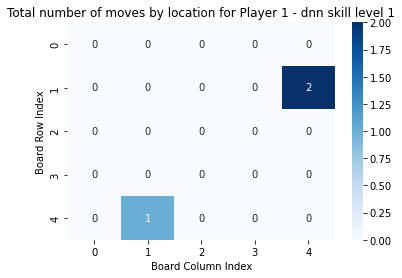

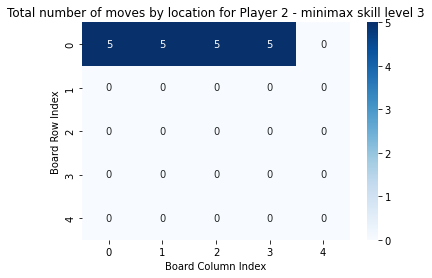

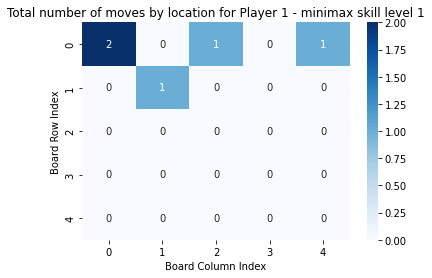

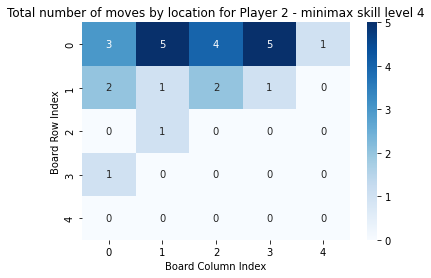

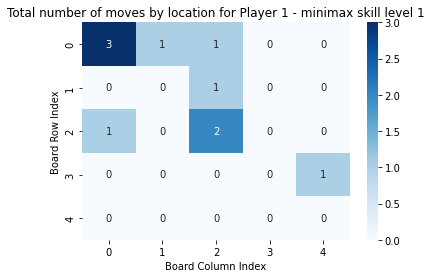

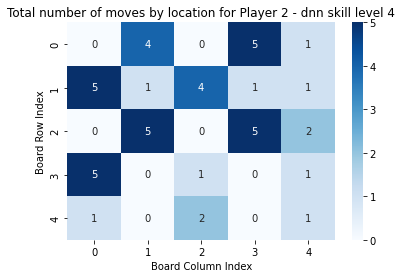

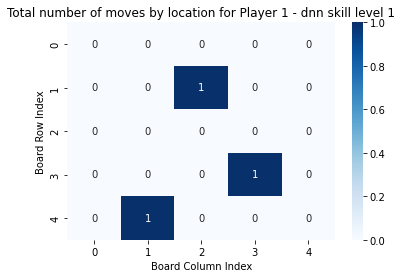

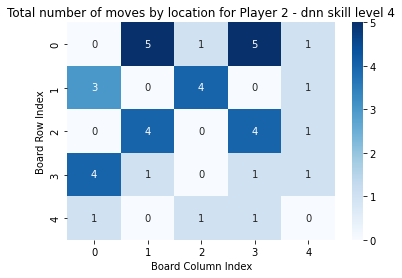

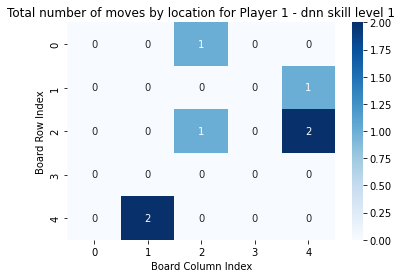

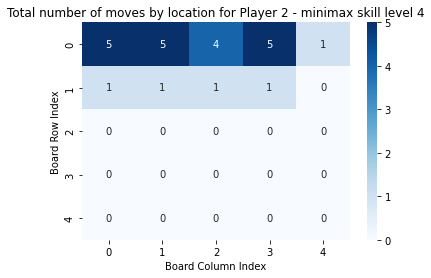

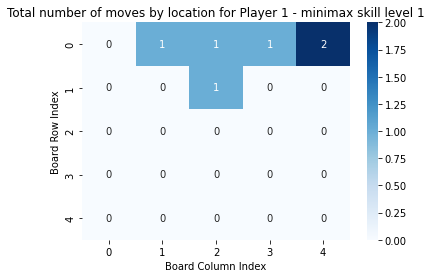

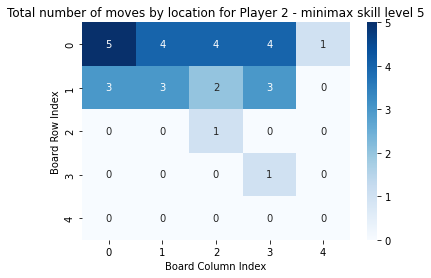

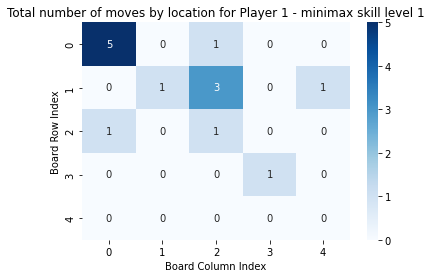

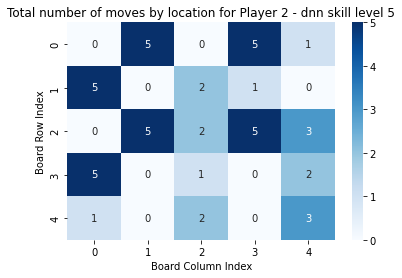

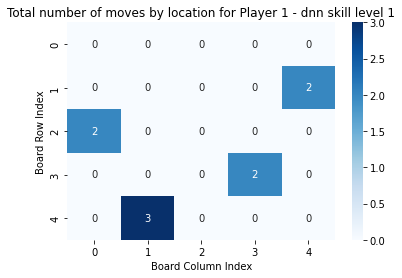

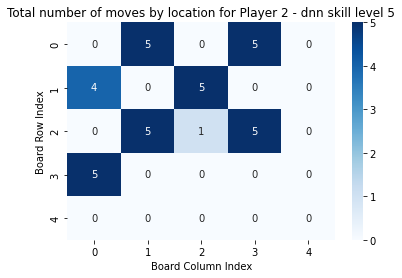

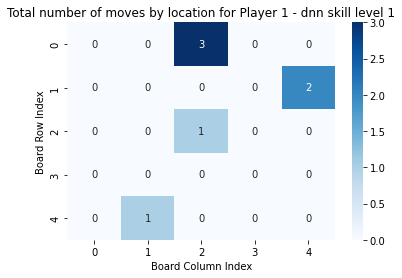

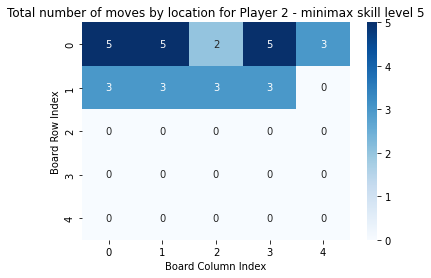

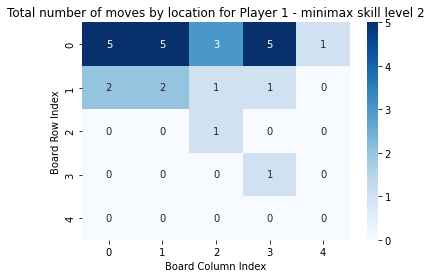

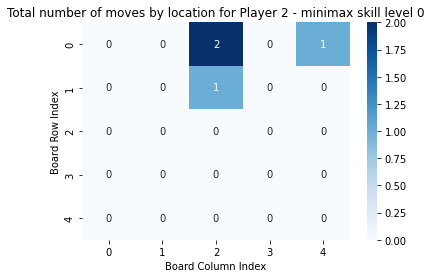

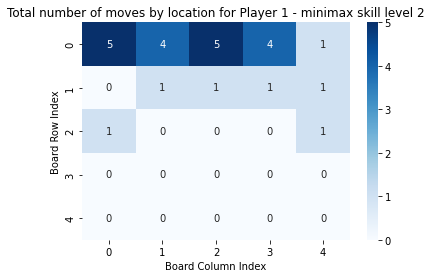

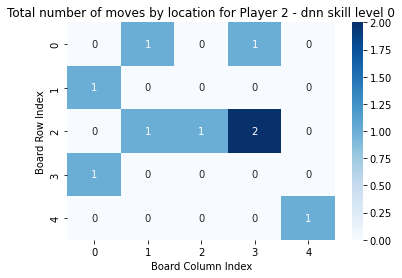

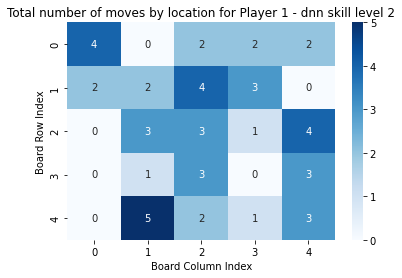

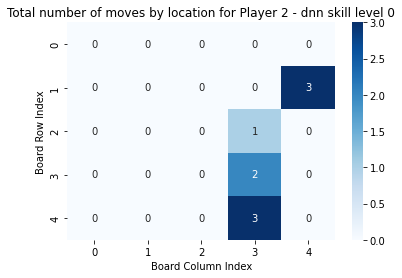

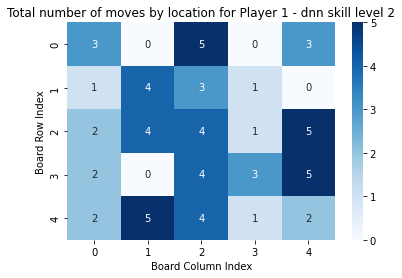

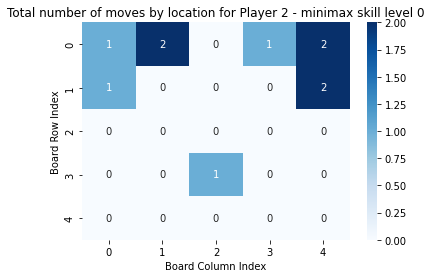

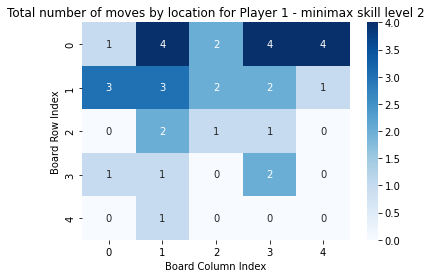

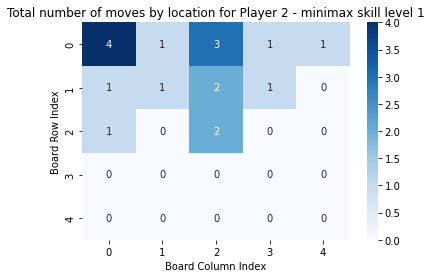

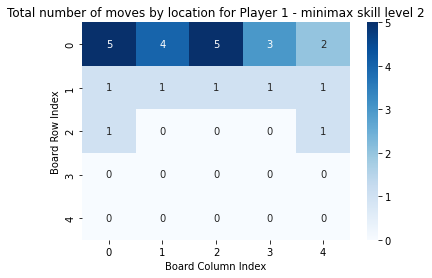

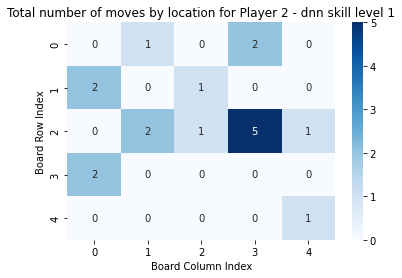

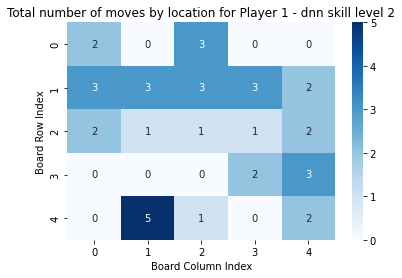

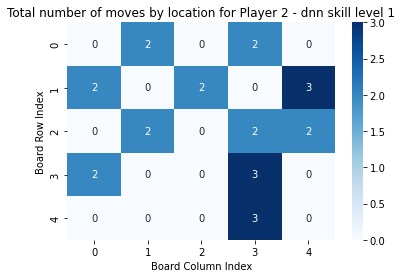

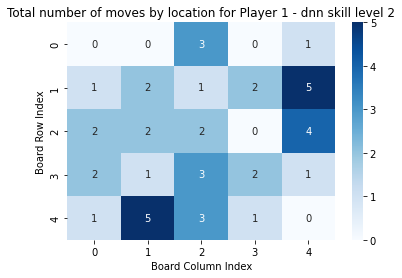

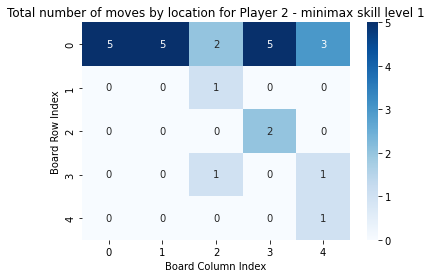

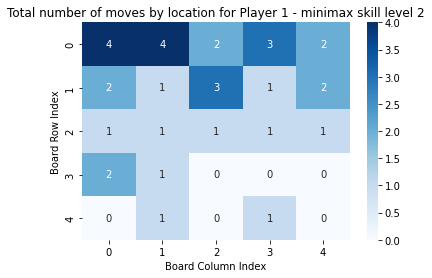

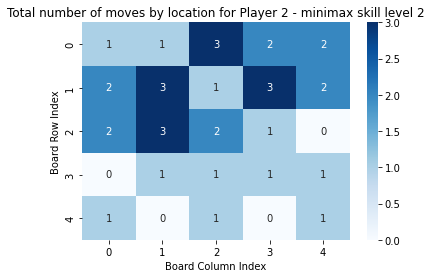

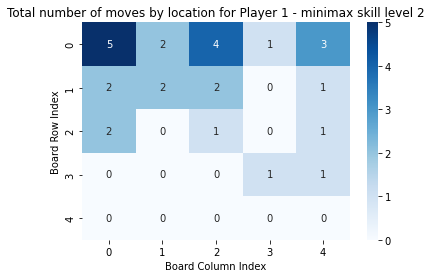

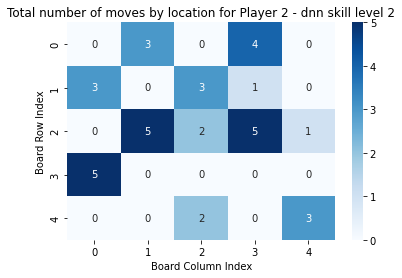

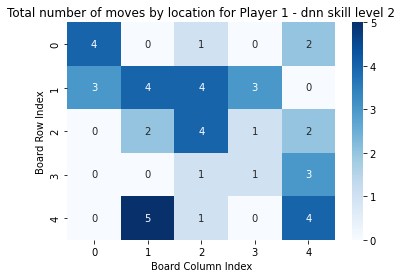

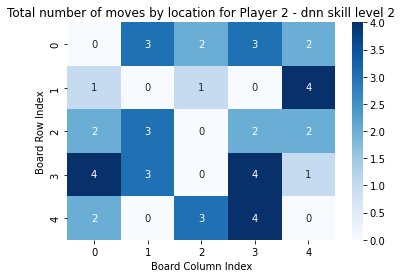

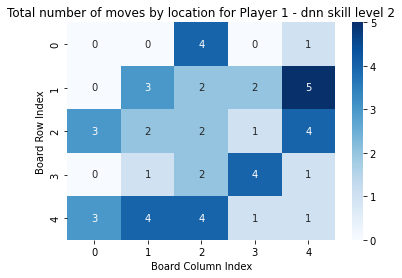

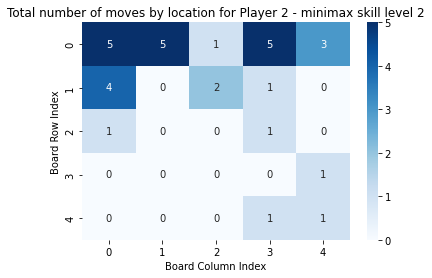

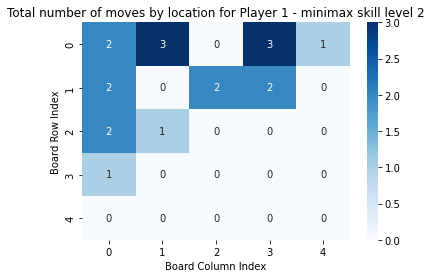

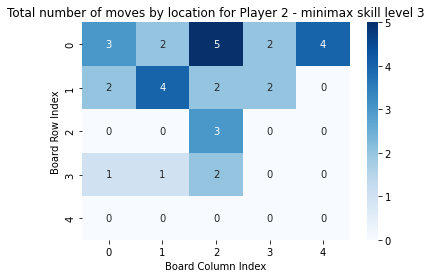

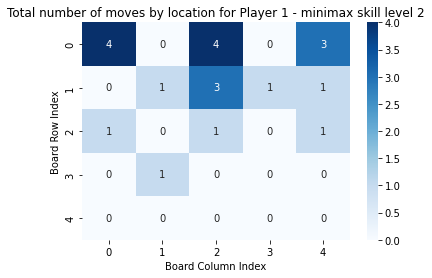

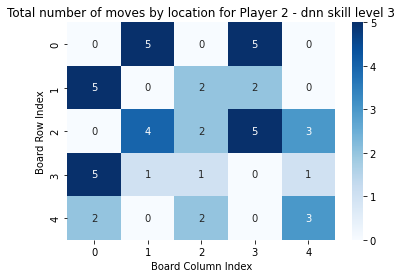

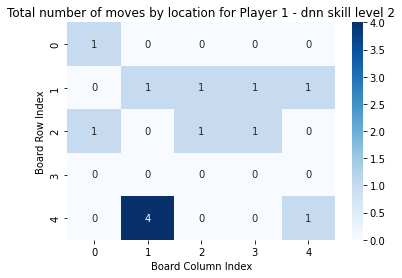

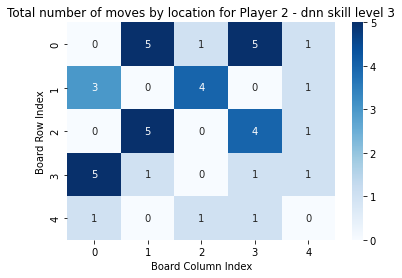

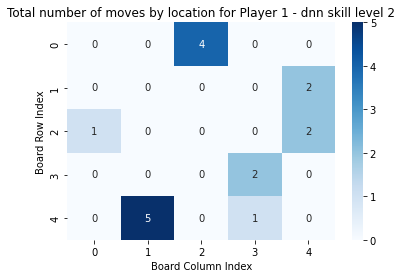

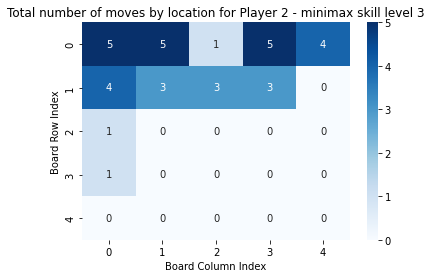

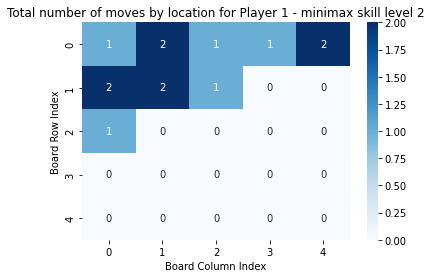

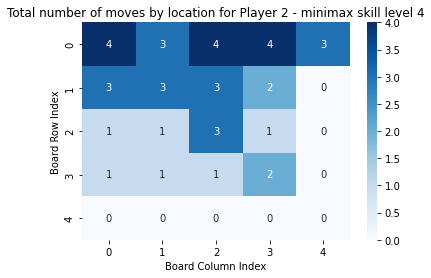

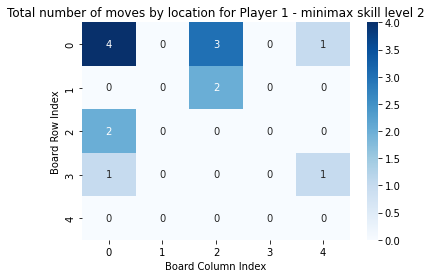

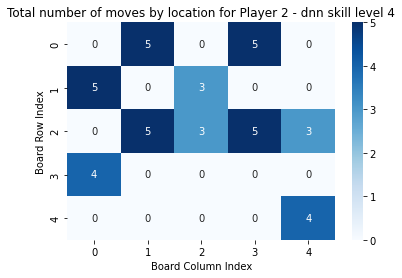

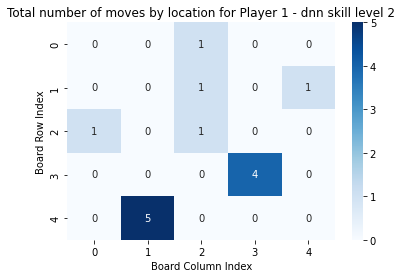

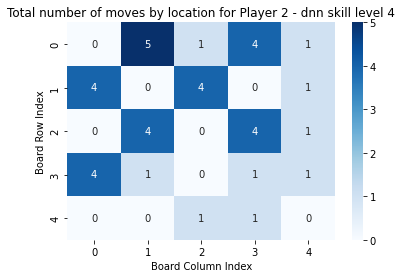

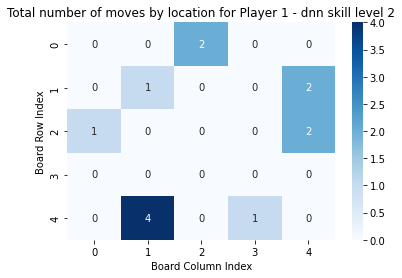

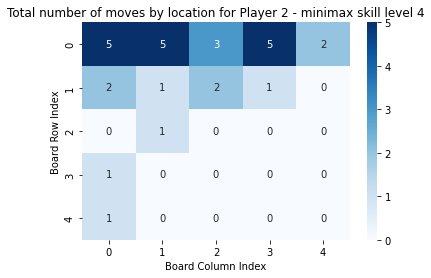

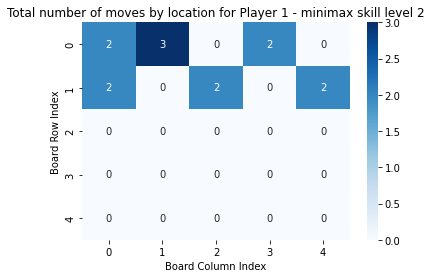

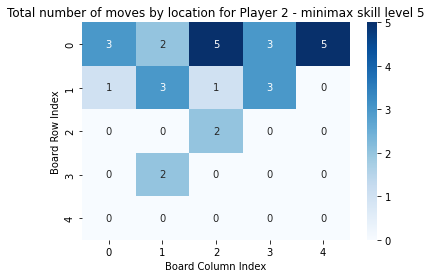

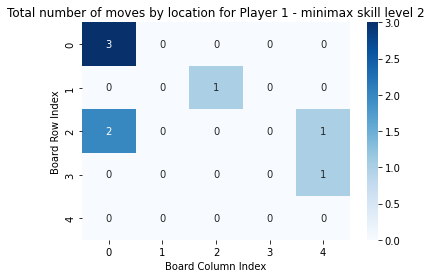

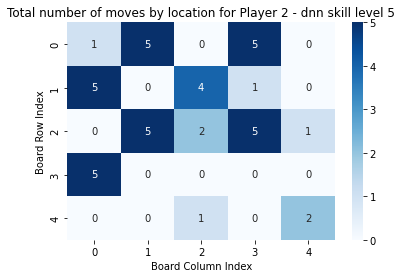

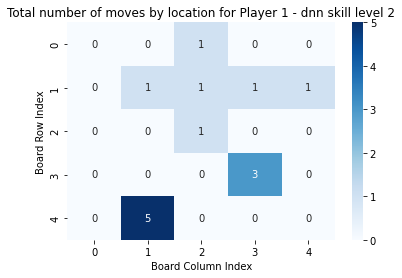

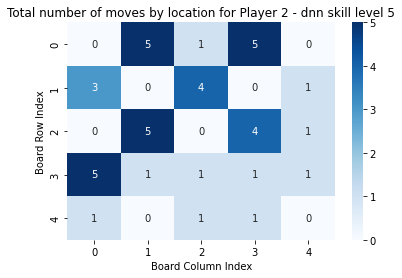

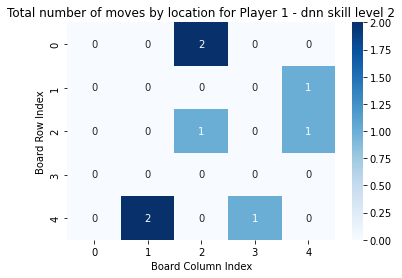

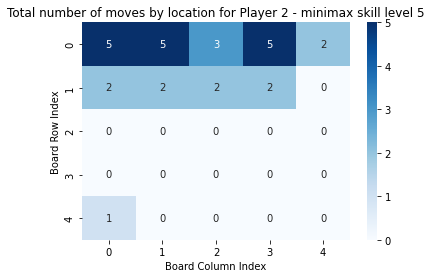

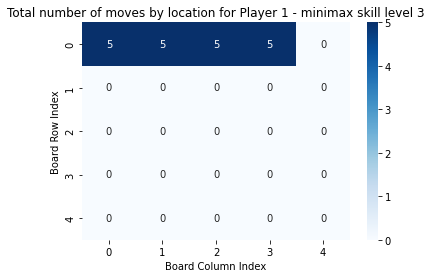

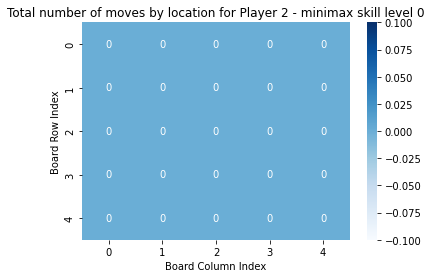

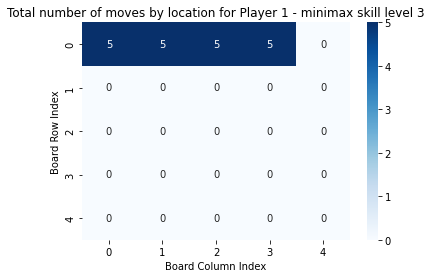

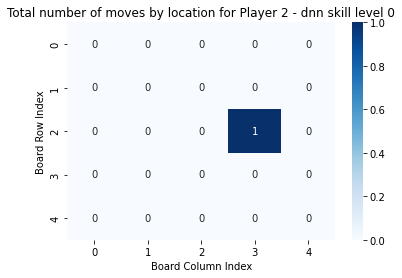

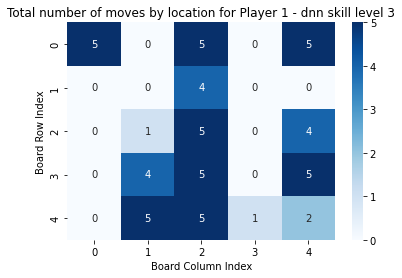

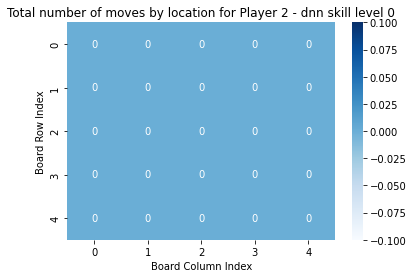

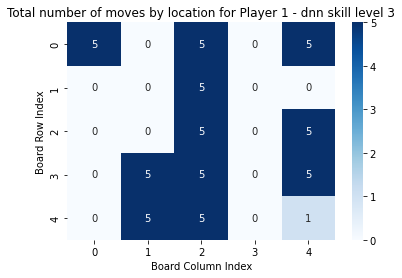

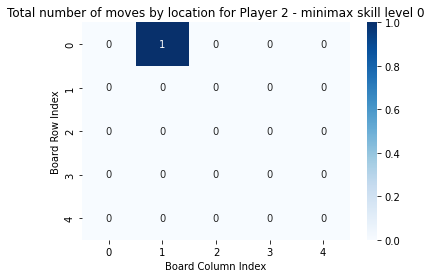

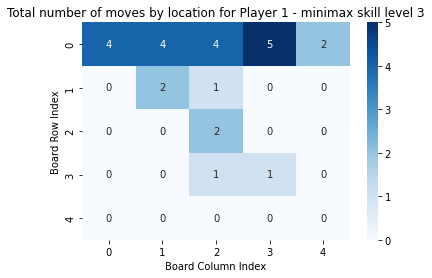

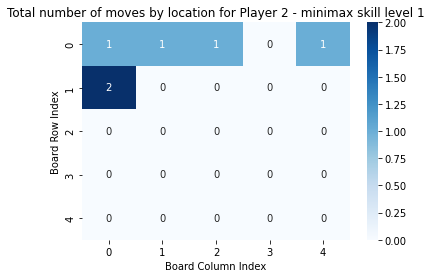

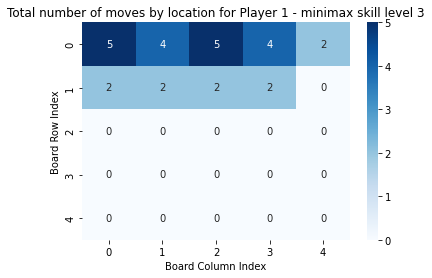

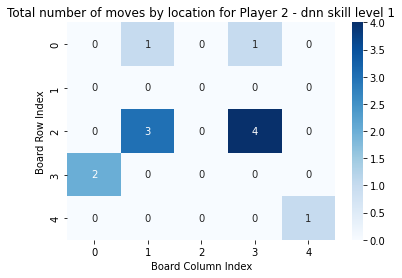

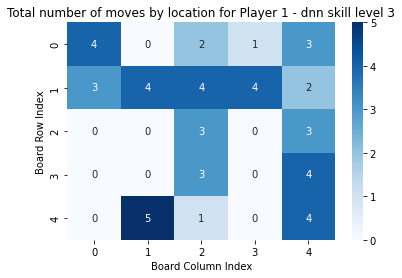

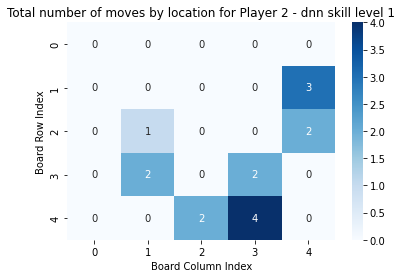

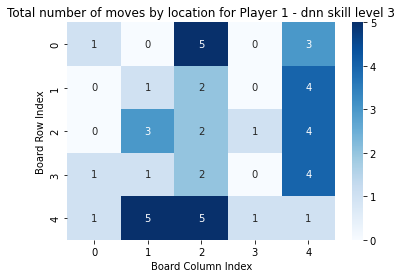

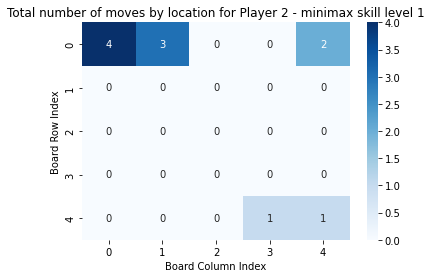

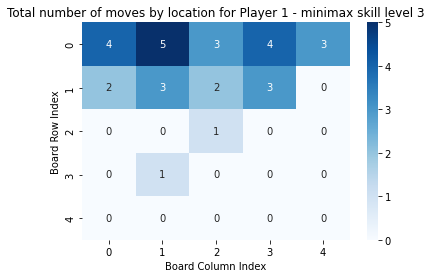

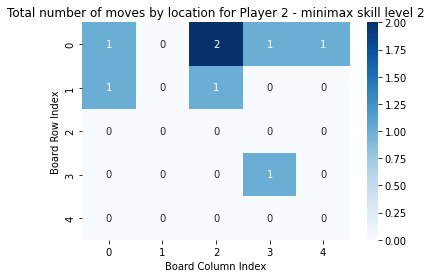

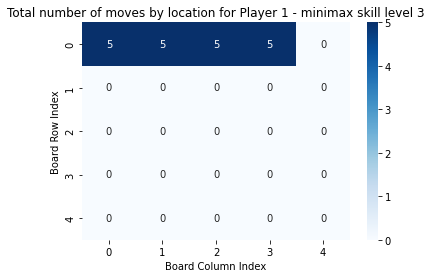

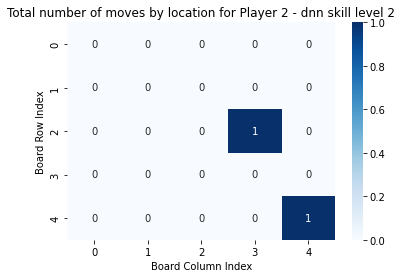

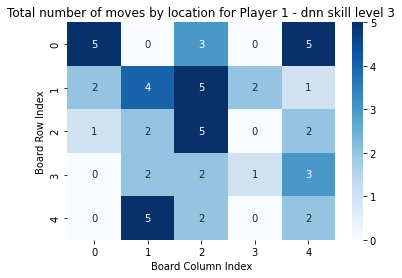

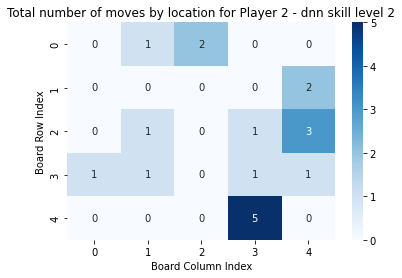

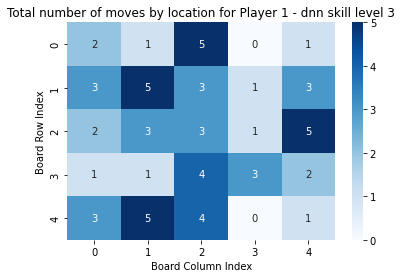

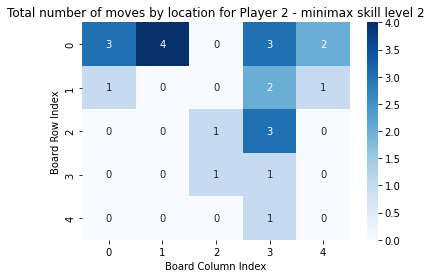

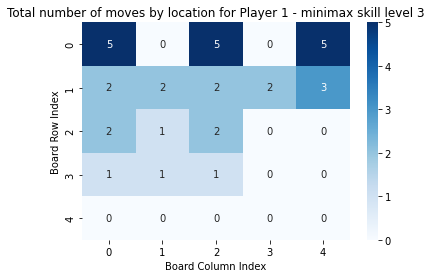

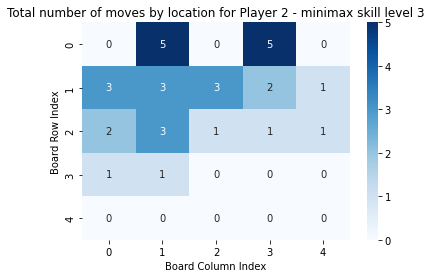

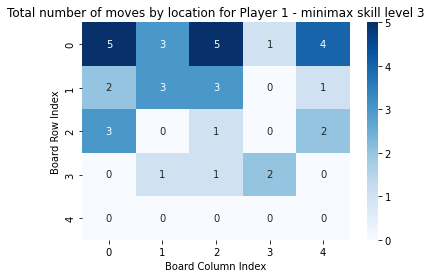

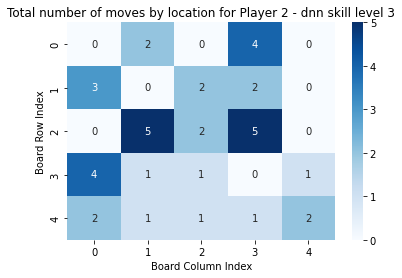

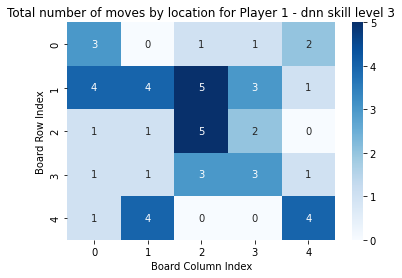

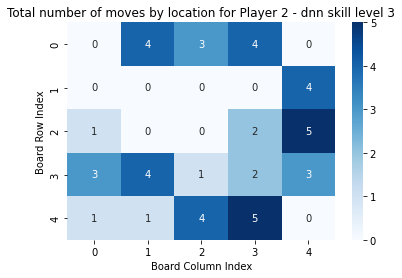

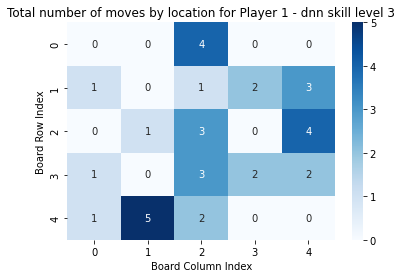

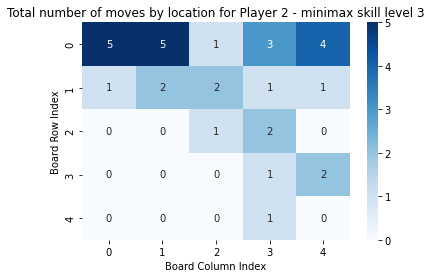

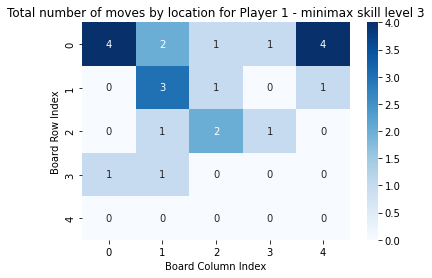

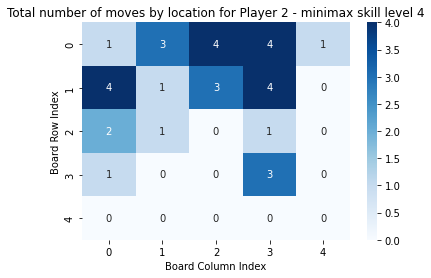

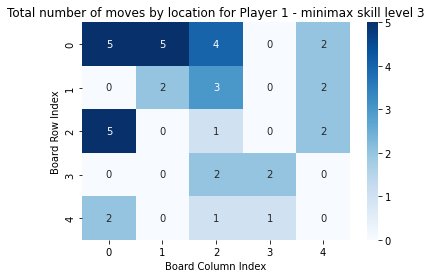

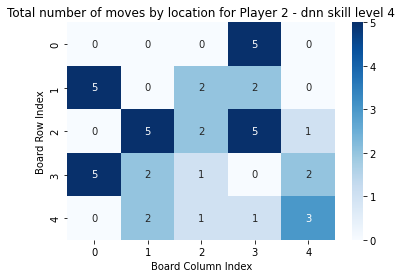

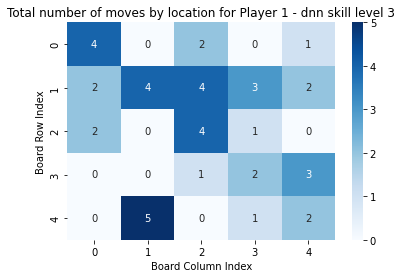

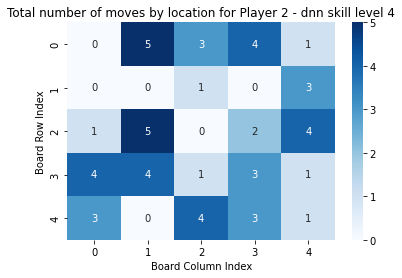

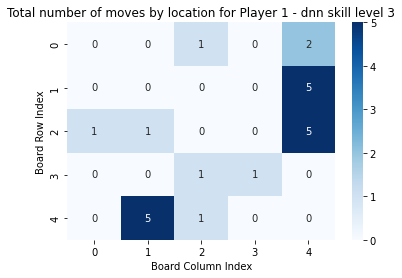

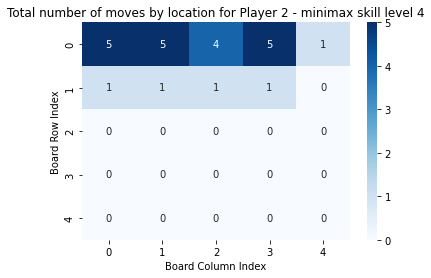

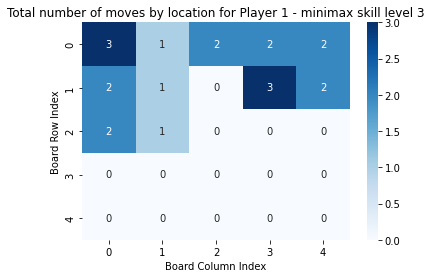

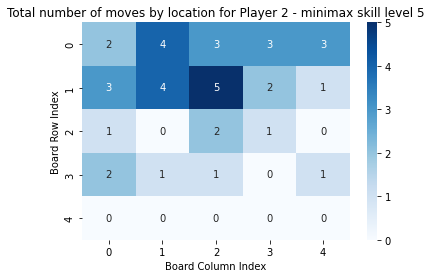

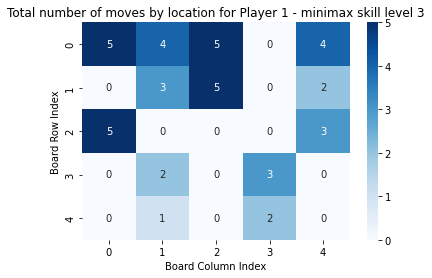

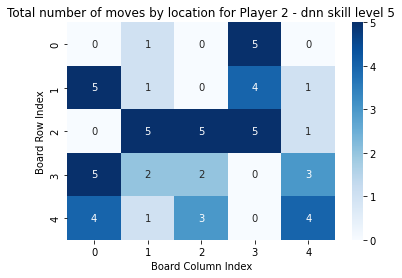

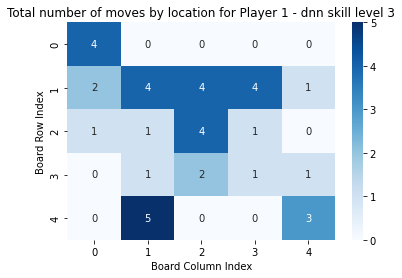

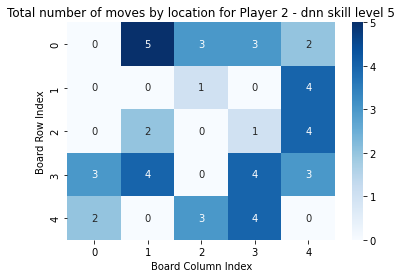

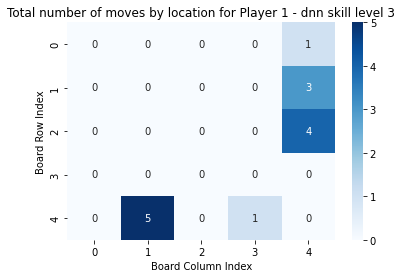

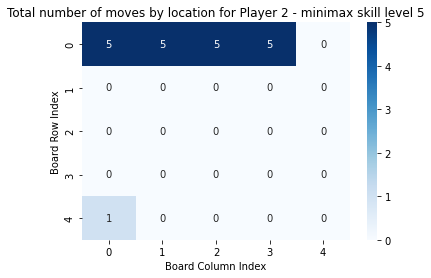

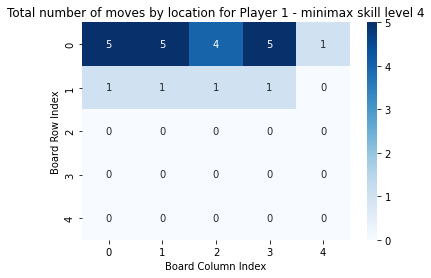

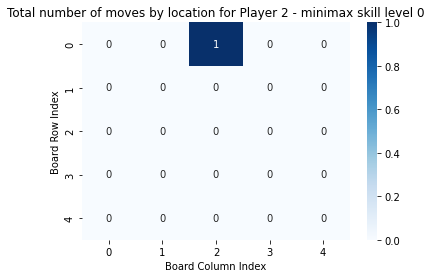

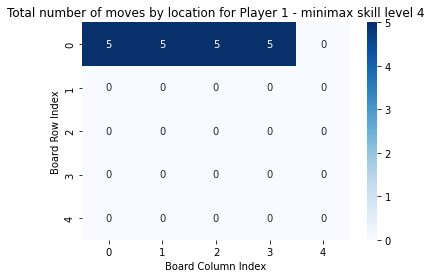

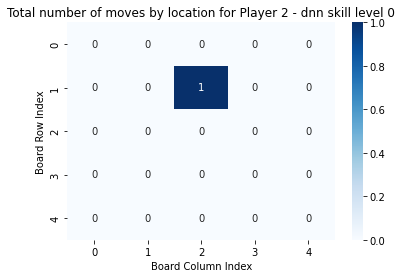

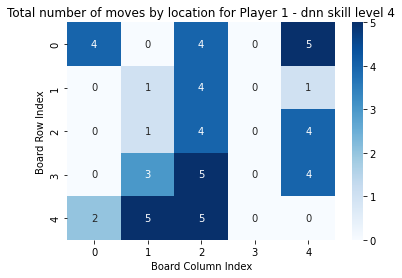

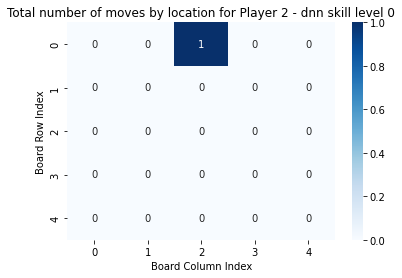

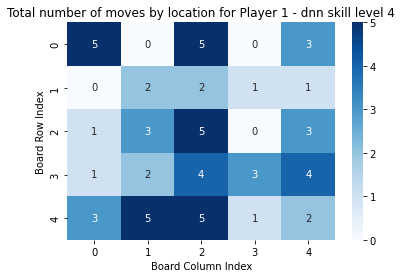

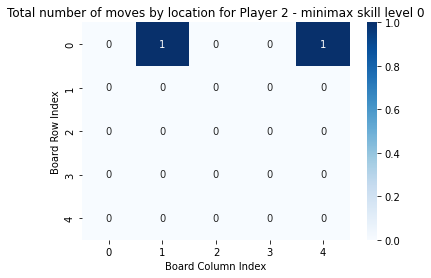

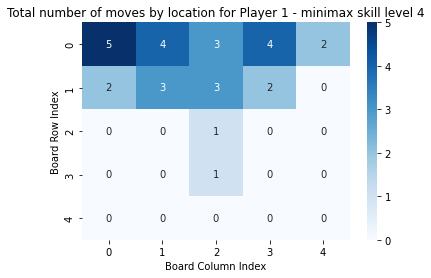

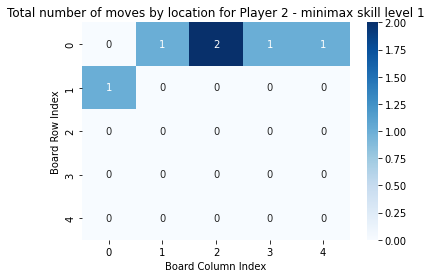

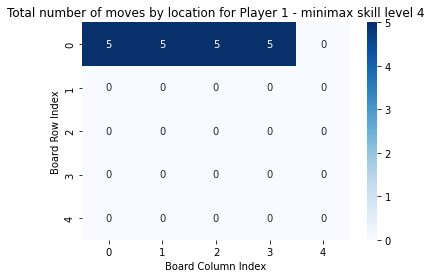

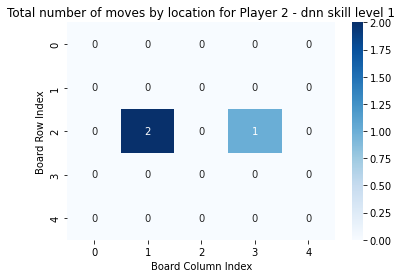

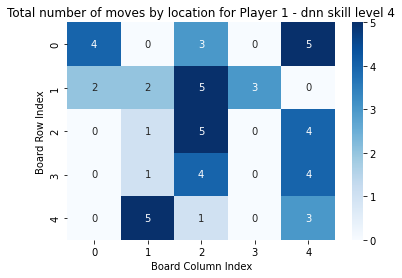

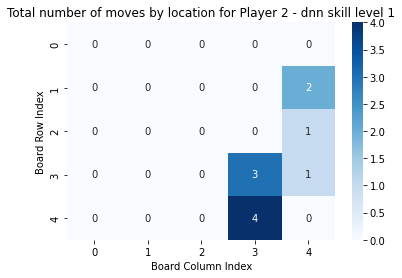

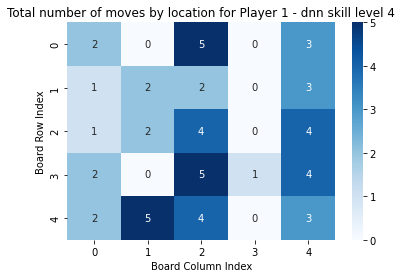

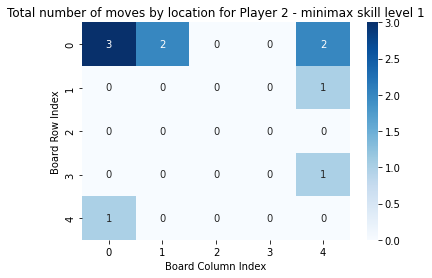

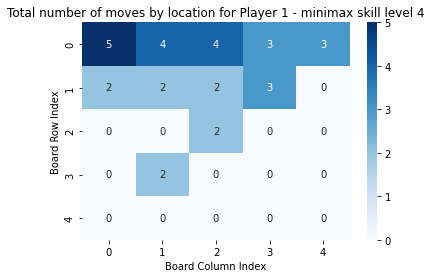

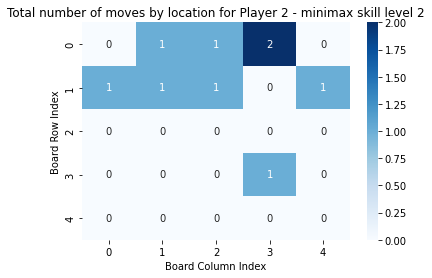

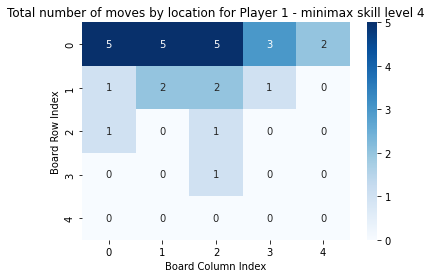

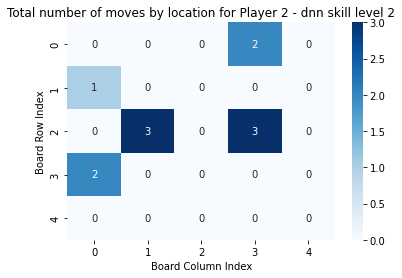

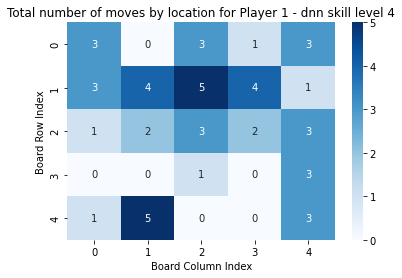

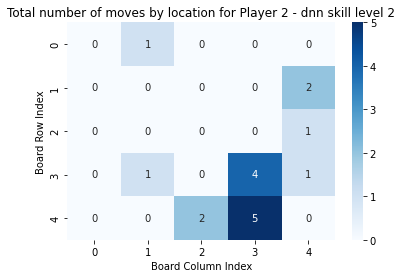

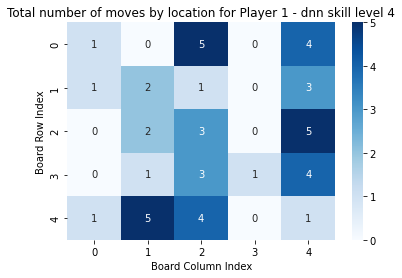

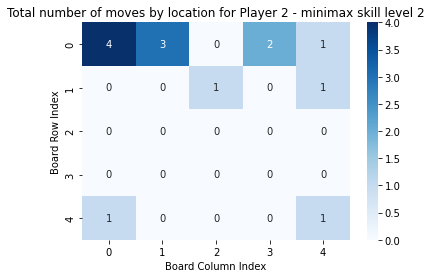

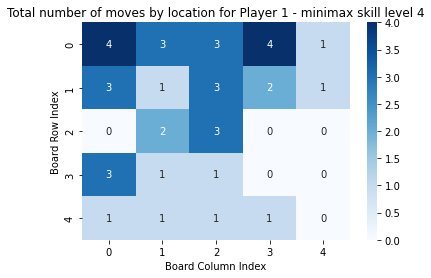

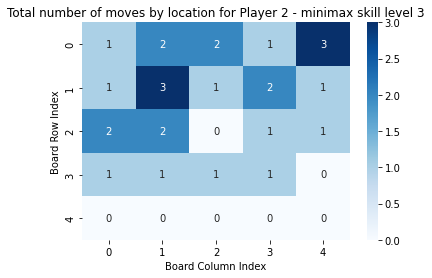

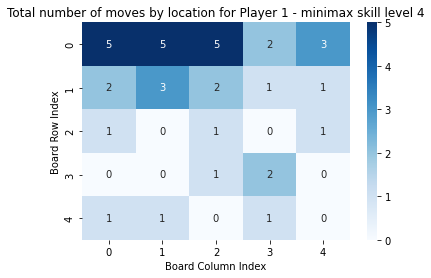

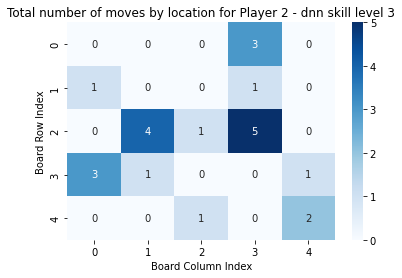

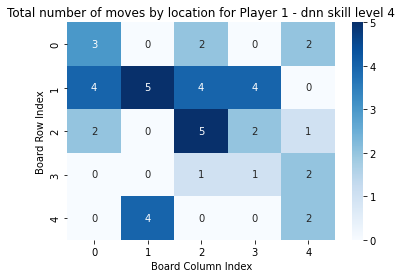

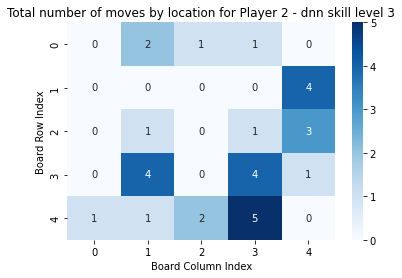

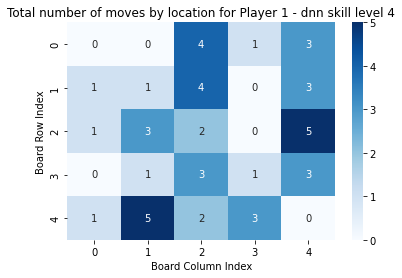

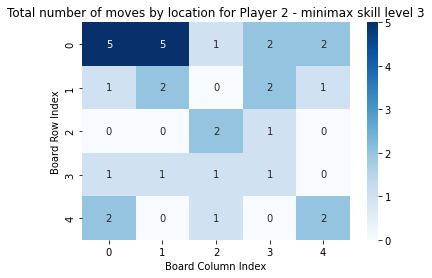

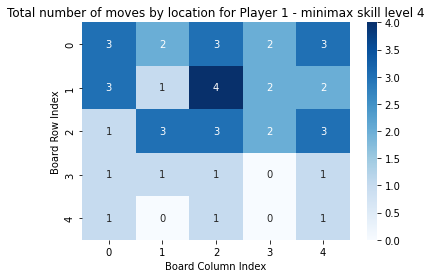

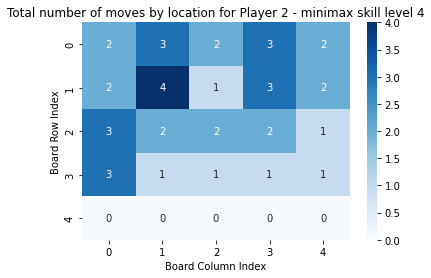

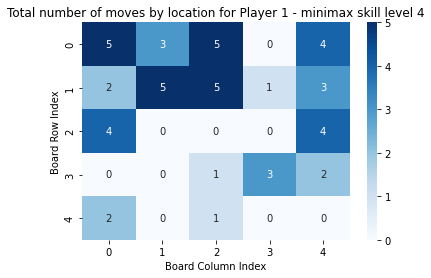

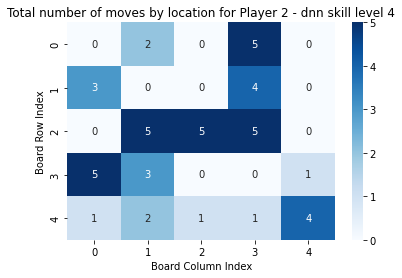

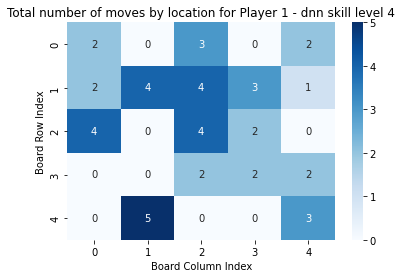

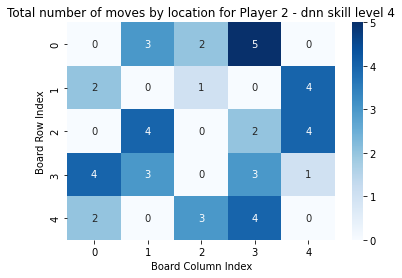

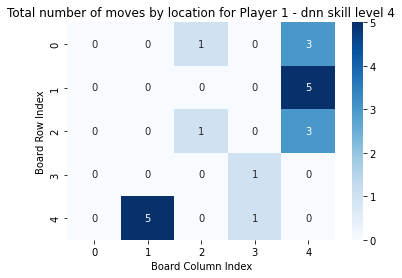

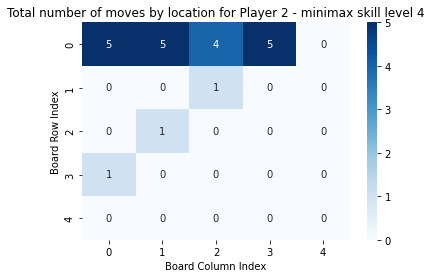

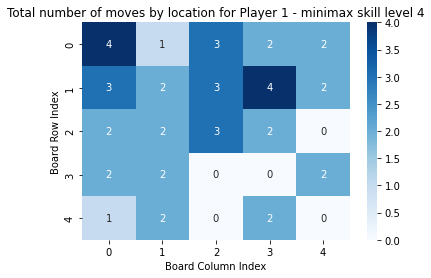

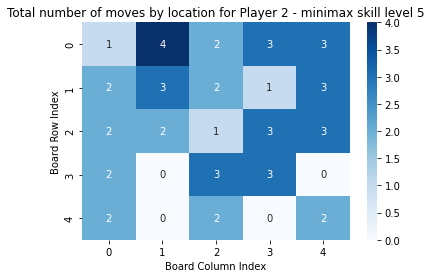

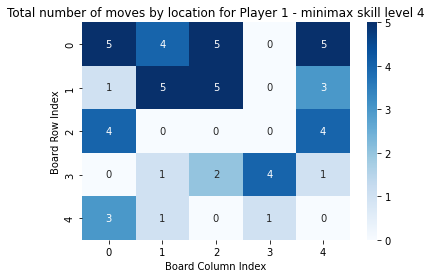

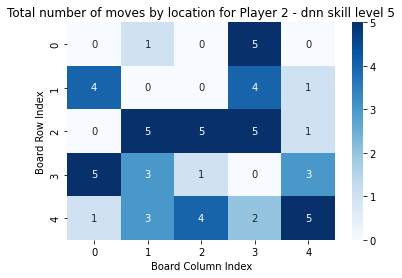

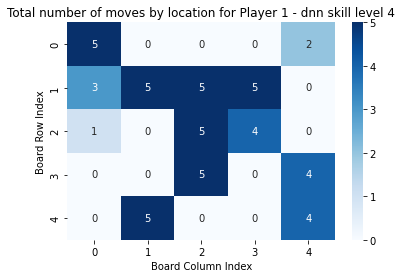

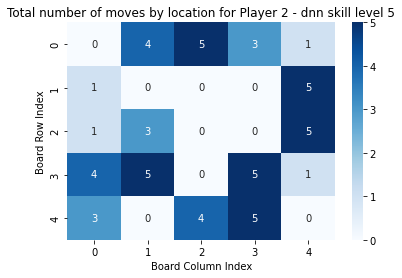

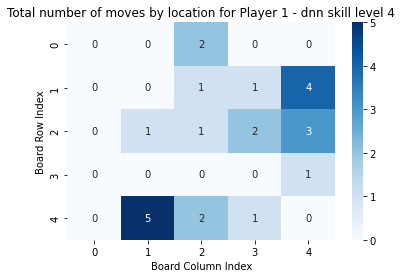

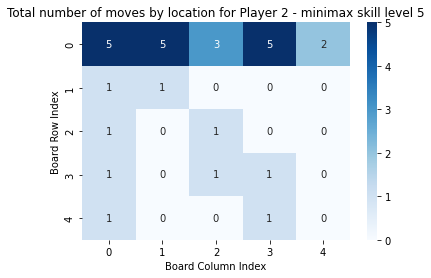

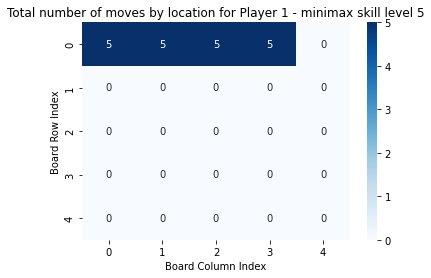

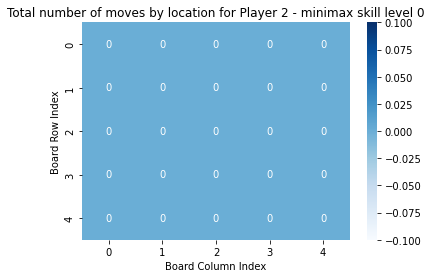

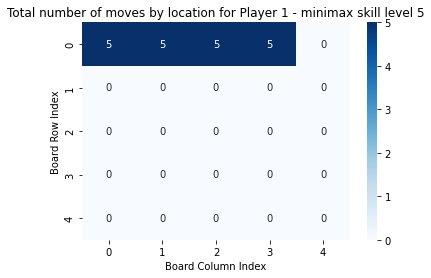

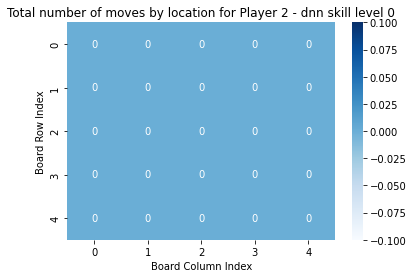

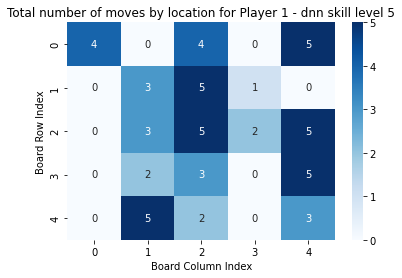

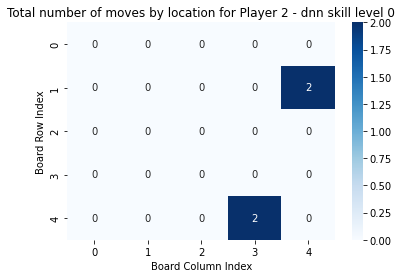

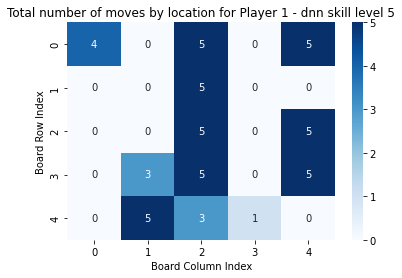

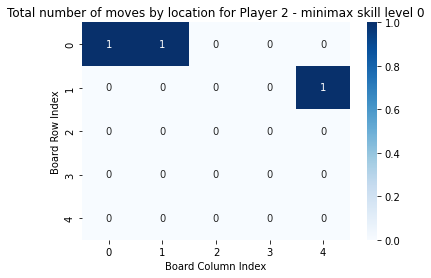

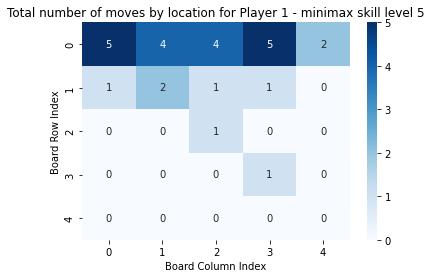

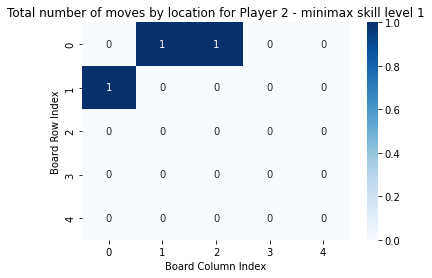

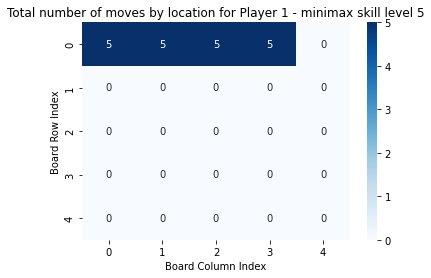

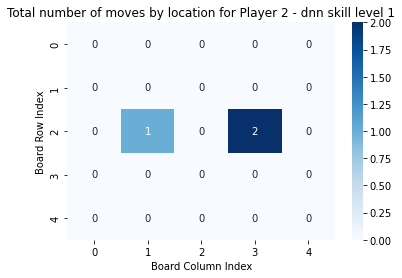

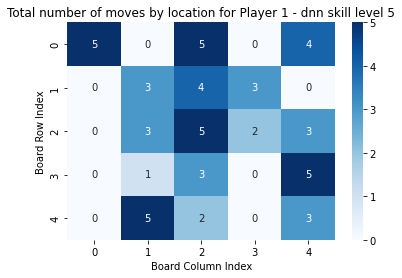

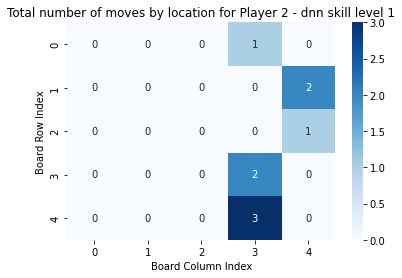

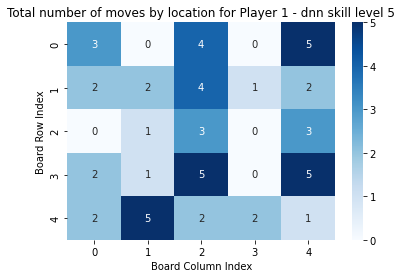

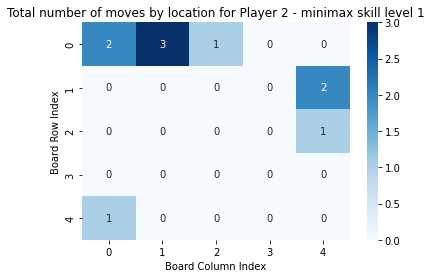

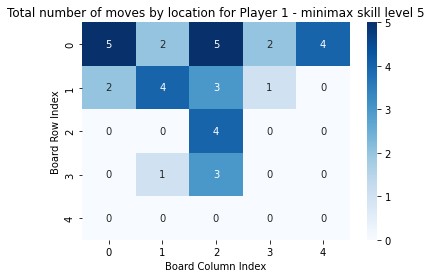

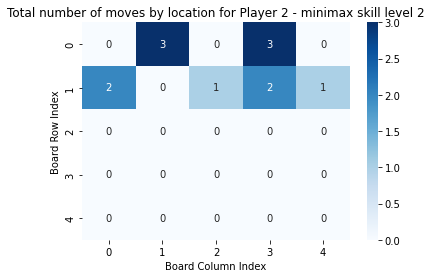

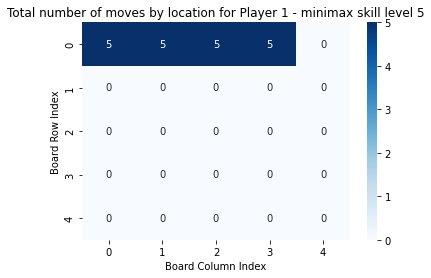

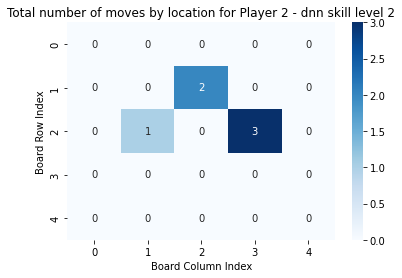

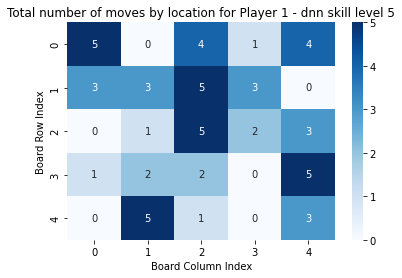

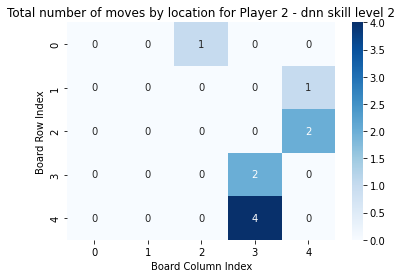

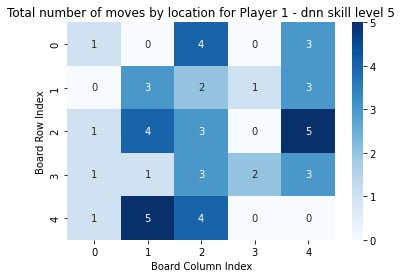

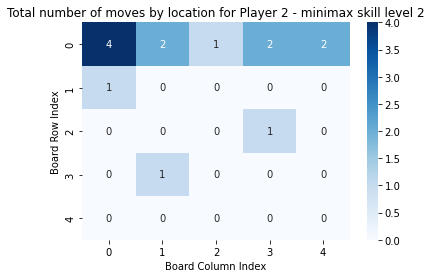

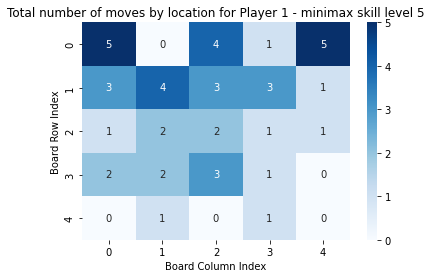

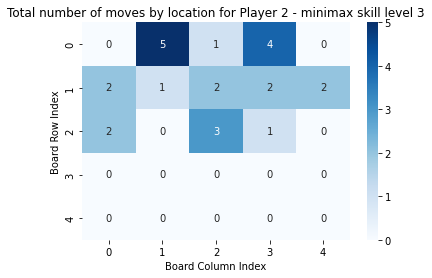

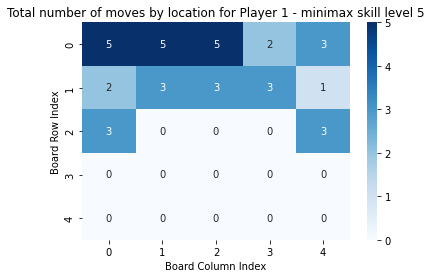

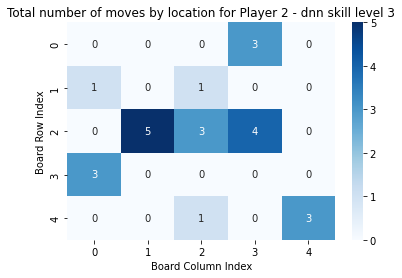

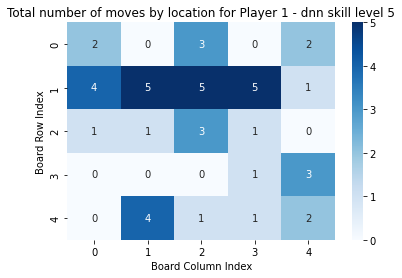

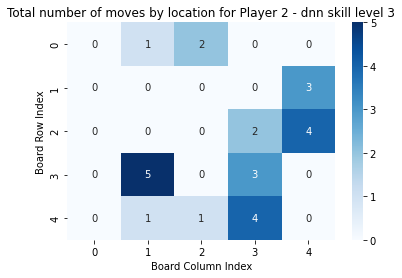

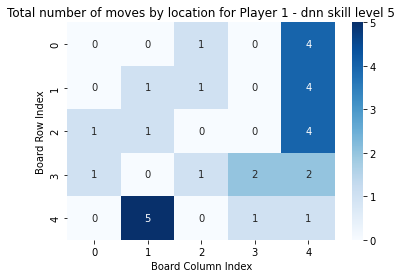

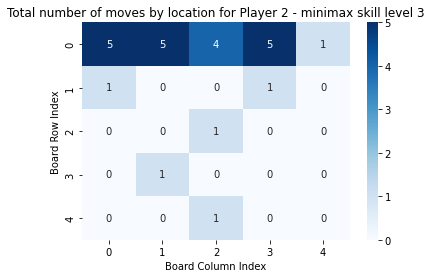

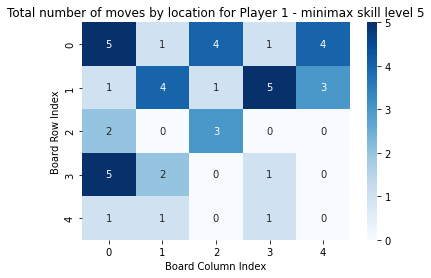

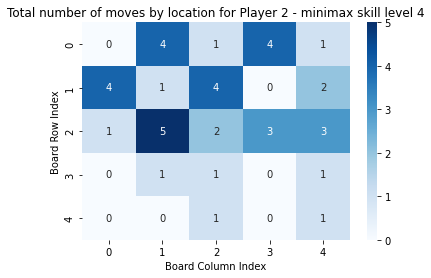

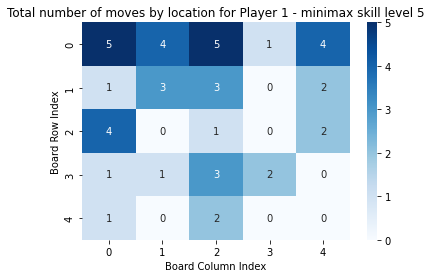

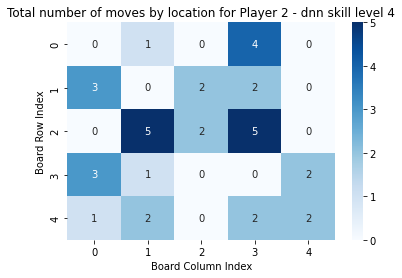

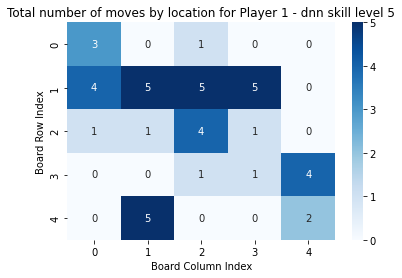

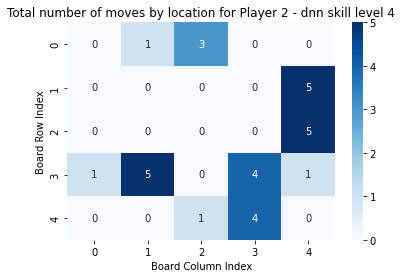

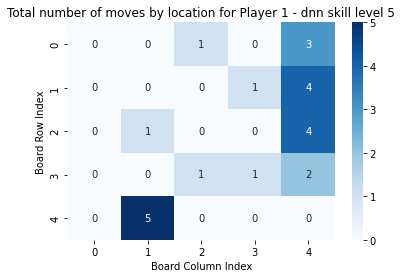

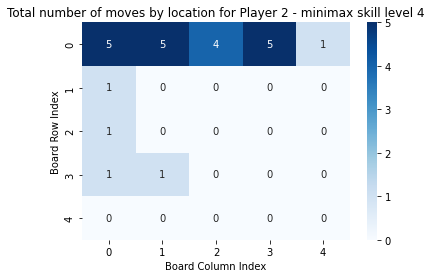

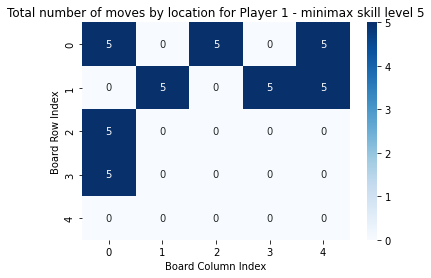

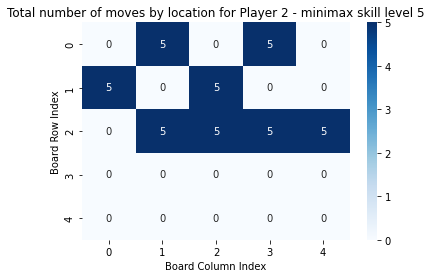

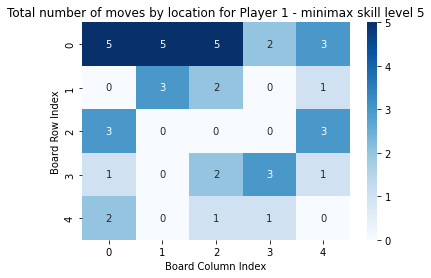

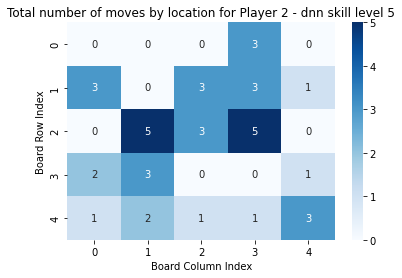

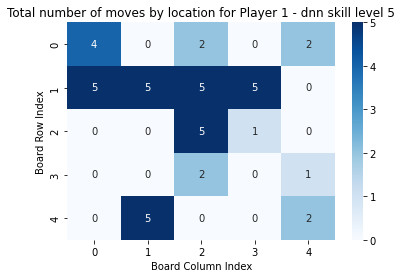

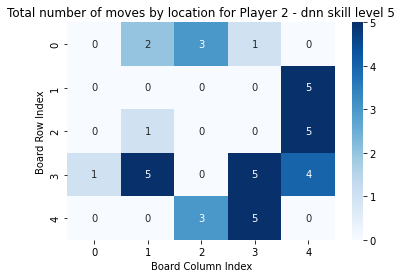

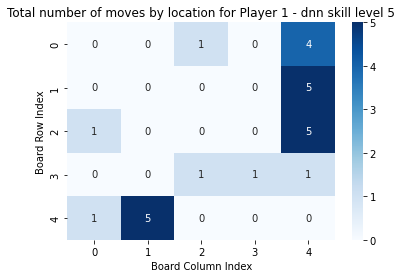

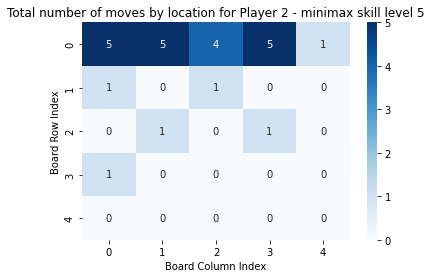

'for p1 in skills1:\n    for p2 in skills2:\n        total_heatmap2(filepath="./5x5_experiments/gameplay_5x5_experiments", p1m="minimax", p2m="dnn", p1s=p1, p2s=p2)\n        \nfor p1 in skills1:\n    for p2 in skills2:\n        total_heatmap2(filepath="./5x5_experiments/gameplay_5x5_experiments", p1m="dnn", p2m="dnn", p1s=p1, p2s=p2)\n        \nfor p1 in skills1:\n    for p2 in skills2:\n        total_heatmap2(filepath="./5x5_experiments/gameplay_5x5_experiments", p1m="dnn", p2m="minimax", p1s=p1, p2s=p2)'

In [7]:
for p1 in skills1:
    for p2 in skills2:
        total_heatmap2(filepath="./5x5_experiments/gameplay_5x5_experiments", p1m="minimax", p2m="minimax", p1s=p1, p2s=p2)
        total_heatmap2(filepath="./5x5_experiments/gameplay_5x5_experiments", p1m="minimax", p2m="dnn", p1s=p1, p2s=p2)
        total_heatmap2(filepath="./5x5_experiments/gameplay_5x5_experiments", p1m="dnn", p2m="dnn", p1s=p1, p2s=p2)
        total_heatmap2(filepath="./5x5_experiments/gameplay_5x5_experiments", p1m="dnn", p2m="minimax", p1s=p1, p2s=p2)
        
'''for p1 in skills1:
    for p2 in skills2:
        total_heatmap2(filepath="./5x5_experiments/gameplay_5x5_experiments", p1m="minimax", p2m="dnn", p1s=p1, p2s=p2)
        
for p1 in skills1:
    for p2 in skills2:
        total_heatmap2(filepath="./5x5_experiments/gameplay_5x5_experiments", p1m="dnn", p2m="dnn", p1s=p1, p2s=p2)
        
for p1 in skills1:
    for p2 in skills2:
        total_heatmap2(filepath="./5x5_experiments/gameplay_5x5_experiments", p1m="dnn", p2m="minimax", p1s=p1, p2s=p2)'''